# DFT energy vs CCS. Includes correlation between DFT energy on MD structures and the energies after DFT geometry optimization

In [2]:
import numpy as np
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import NullFormatter
from scipy.stats import gaussian_kde
from scipy.stats.stats import pearsonr
from scipy.stats import linregress

import seaborn as sns
from scipy.stats.stats import pearsonr
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression

In /anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


In [3]:
# hartree = 627.509 kcal/mol
names = ['Harmine', '1-Methylguanosine', 'Sphingosine', 'riboflavin', 'Mandelonitrile',
         'Creatinine', 'Methyleugenol', 'N6-methyladenosine', 'Cholic Acid', 'Astilbin',
         'SDGRG', 'Biliverdin', 'Anthranilic acid', 'Aminohippuric acid',
        '3\'-O-methylguanosine', 'Sucrose', 'Naringin', 'PE 16:1/16:1']
key = ['BXNJHAXVSOCGBA-UHFFFAOYSA-N','UTAIYTHAJQNQDW-KQYNXXCUSA-N','WWUZIQQURGPMPG-CCEZHUSRSA-N',
         'AUNGANRZJHBGPY-SCRDCRAPSA-N','NNICRUQPODTGRU-SVGMAFHSNA-N','DDRJAANPRJIHGJ-UHFFFAOYSA-N',
         'ZYEMGPIYFIJGTP-UHFFFAOYSA-N','VQAYFKKCNSOZKM-IOSLPCCCSA-N','BHQCQFFYRZLCQQ-OELDTZBJSA-N',
         'ZROGCCBNZBKLEL-MPRHSVQHSA-N','UVLWLKCNNYTXDT-XDTORHTBNA-N','QBUVFDKTZJNUPP-BBROENKCNA-N',
         'RWZYAGGXGHYGMB-UHFFFAOYSA-N','HSMNQINEKMPTIC-UHFFFAOYSA-N','UYARPHAXAJAZLU-KQYNXXCUSA-N',
         'CZMRCDWAGMRECN-UGDNZRGBSA-N','DFPMSGMNTNDNHN-ZPHOTFPESA-N','PGPMCWZMPPZJML-UHIQGXGONA-N']
molids = ['02', '03', '04', '05', '10', '11', '12', '14', '16', '17', '18', '19', '21', 
          '22', '24', '25', '28', '29']
adducts = ['+H','+H','+H','+H','+H',
           '+Na','+Na','+Na','+Na','+Na','+Na','+Na', 
           '-H', '-H', '-H', '-H', '-H', '-H']
mass = [212.094963, 297.1073186, 299.2824294, 376.1382844, 133.0527639, 113.0589119,
        178.0993797, 281.112404, 408.2875744, 450.1162115, 490.2135746, 582.2478348,
        137.0476785, 194.0691422, 297.1073186, 342.1162115, 580.1792057, 687.4839047]
mass_adduct = [213.102788047, 298.117886535, 300.291351627, 377.149400892, 134.059491722, 136.04922972,
               201.08860039, 304.10546474, 431.27844083, 473.11036945, 513.20718392, 605.23870127,
               136.040950597, 193.062962898, 296.103333630, 341.113323715, 579.176866477, 579.176866477]
hexs = ['#f90000', '#f95200', '#f98800', '#f9ae00', '#f9db00', '#ecf900', '#9df900', '#00f94a', 
        '#00f9c7', '#00f4f9', '#00b6f9', '#007cf9', '#0014f9', '#ae00f9', '#f900f9', '#f90091', 
        '#a5a5a5', '#e3e3e3']
hexs2 = ['#f90000', '#f95200', '#f98800', '#f9ae00', '#f9db00', '#93e800', '#00f94a', 
         '#00d1a7', '#00dfe3', '#00b6f9', '#007cf9', '#0014f9', '#ae00f9', '#f900f9', '#f90091',
         '#000000', '#a5a5a5', '#d9d9d9']
letters = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R']
numbers = [ 1,  2,  3,  4,  5,  6,   7,  8,  9,  10, 11, 12,  13, 14, 15, 16, 17, 18]
numbers2 = [6,  5,  13, 7,  14, 1,  8,  15, 2,  3,  16, 4,  9,  10, 11, 17, 12, 18]
letters2 = ['F', 'I', 'J', 'L', 'B', 'A', 'D', 'G', 'M', 'N', 'O', 'Q', 'C', 'E', 'H', 'K', 'P', 'R']

### DFT Energy vs CCS, single figure

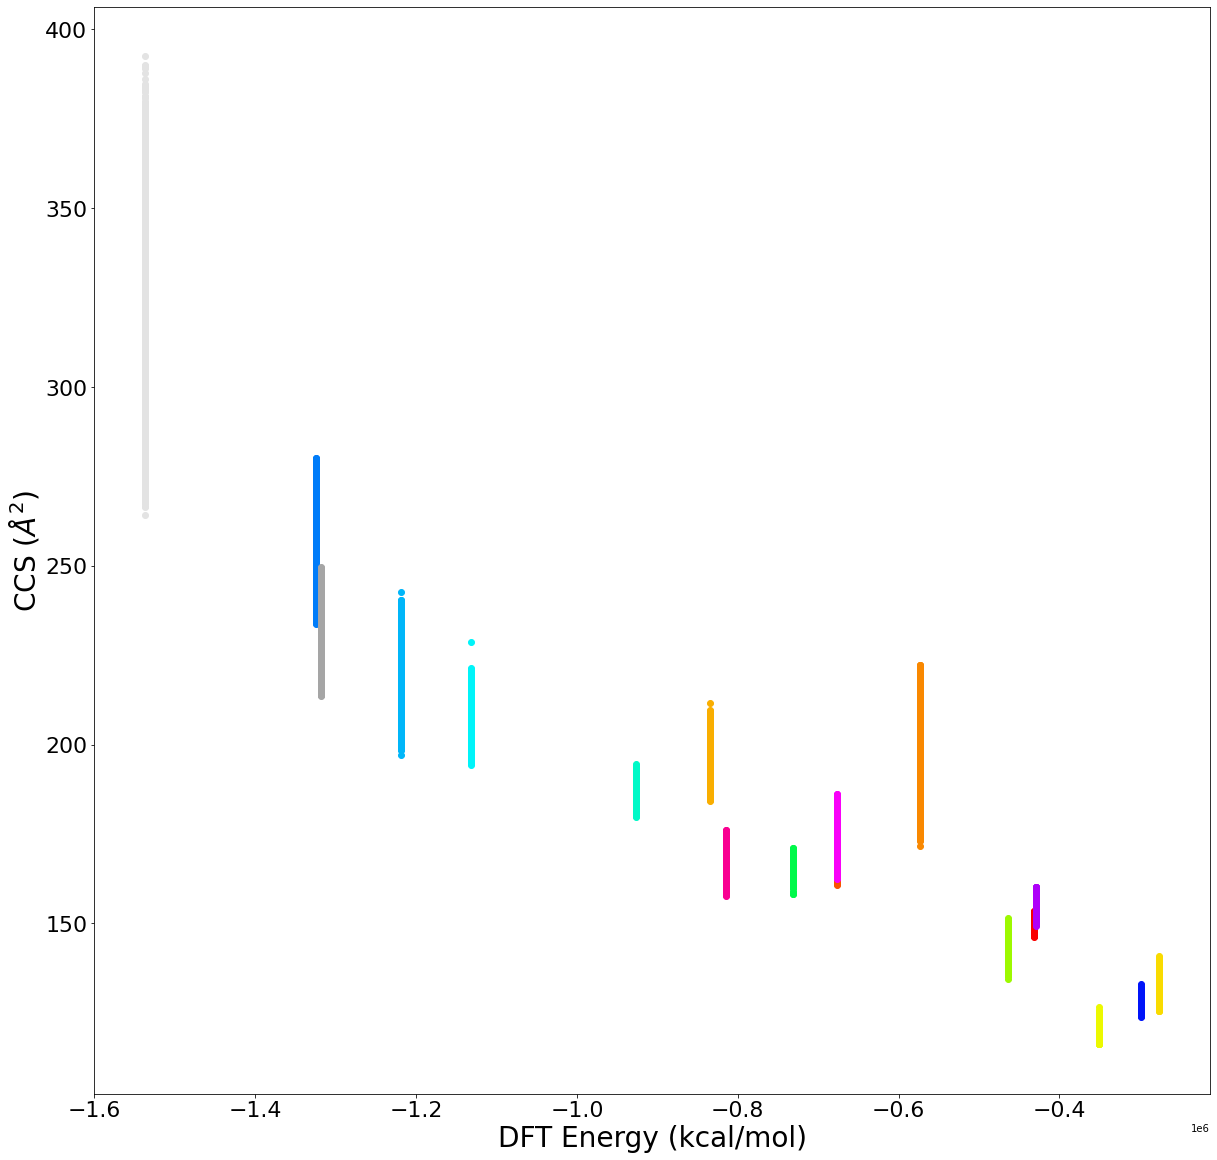

In [3]:
plt.figure(1, figsize=(20, 20))
for i, ID in enumerate(molids):
    file = f'../data/molid{ID}_ccs.csv'
    
    if os.path.exists(file):
        pass
    else:
        continue    

    df = pd.read_csv(file)

    x = df['dft_energy'] * 627.509
    y = df['ccs']
    plt.scatter(x, y, c=f'{hexs[i]}')

plt.ylabel('CCS ($\AA^2$)', fontsize=28)
plt.xlabel('DFT Energy (kcal/mol)', fontsize=28)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.show()

### CCS vs Mass, single plot

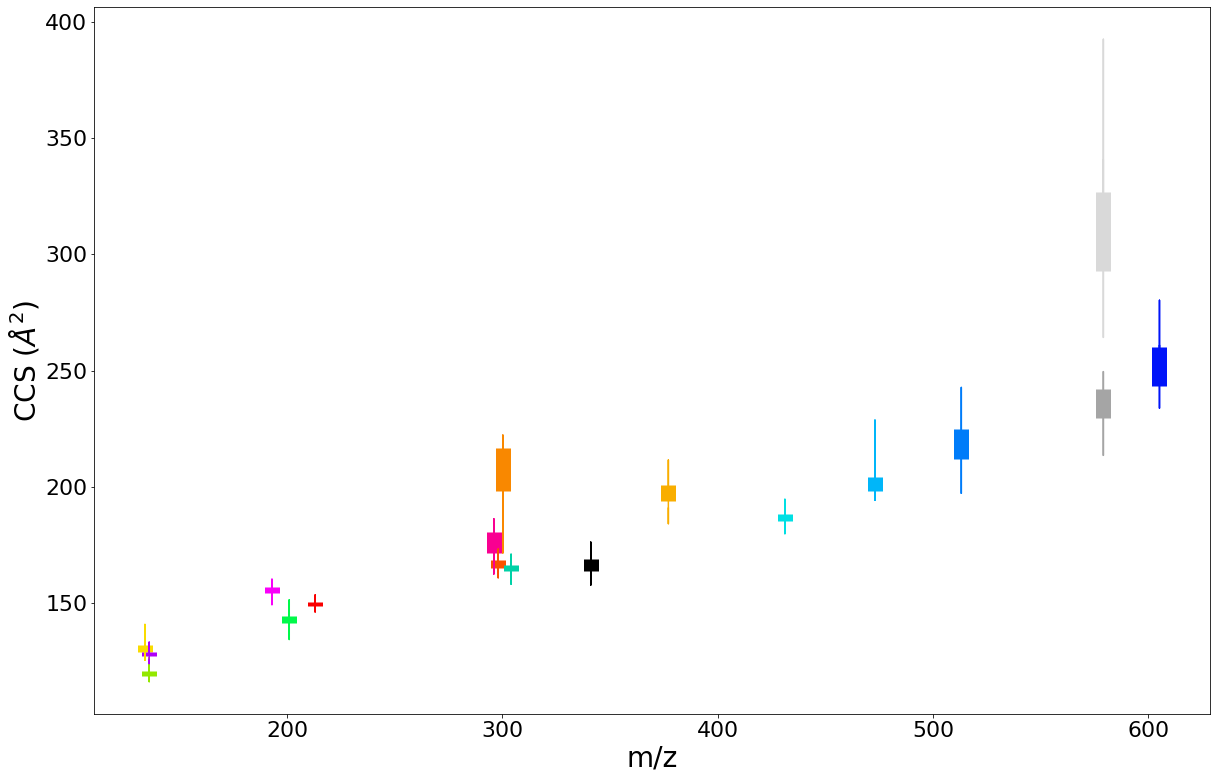

In [4]:
# Ranges, thin
# stdev, thick

a = 20
b = np.ceil(a*1.61803398875 - a)
plt.figure(1, figsize=(a,b))

ccs_ave = []
ccs_std = []

for i, ID in enumerate(molids):
    file = f'../data/molid{ID}_ccs.csv'
    
    if os.path.exists(file):
        pass
    else:
        continue    

    df = pd.read_csv(file)

    plt.plot([mass_adduct[i]]*len(df), df['ccs'], c=hexs2[i])
    
    # Get average and stdev of CCS
    ccs_ave.append(df['ccs'].mean())
    ccs_std.append(df['ccs'].std())

    
plt.errorbar(mass_adduct, ccs_ave, ccs_std, linestyle='None', elinewidth=15, ecolor=hexs2)


plt.ylabel('CCS ($\AA^2$)', fontsize=28)
plt.xlabel('m/z', fontsize=28)
plt.tick_params(axis='both', which='major', labelsize=22)
#plt.savefig('ccs-vs-mass-all-v3.png', dpi=900, bbox_inches='tight')
plt.show()

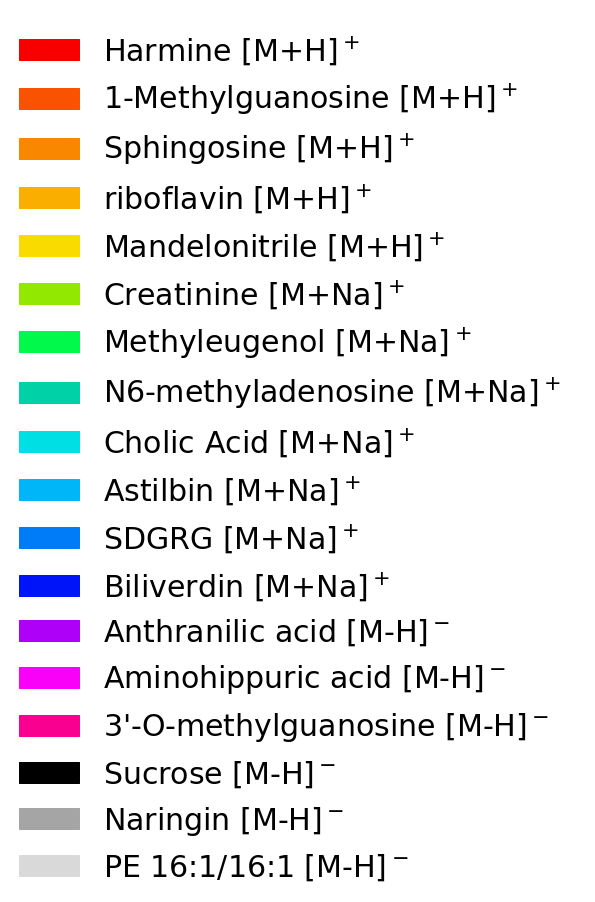

In [5]:
patches = []
for i, h in enumerate(hexs2):
    patches.append(mpatches.Patch(color=f'{h}', label=f'{names[i]} [M{adducts[i]}]$^{adducts[i][0]}$')) #label=names[i]))
    
plt.legend(handles=patches, prop={'size': 30}, frameon=False)
plt.axis('off')
#plt.savefig('ccs-vs-mass-all-legend.png', dpi=900, bbox_inches='tight')
plt.show()

### DFT Energy vs ccs, separate, scaled same, flat color  

max-min =  7.323299999999989


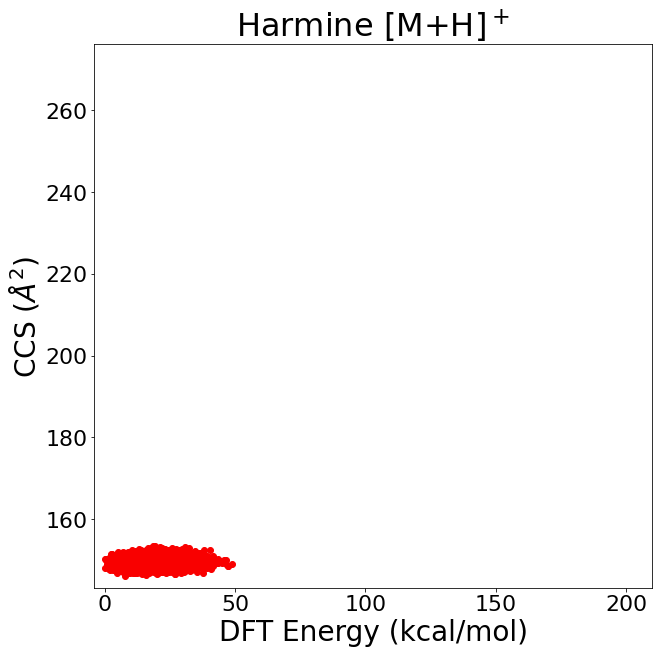

max-min =  12.364299999999986


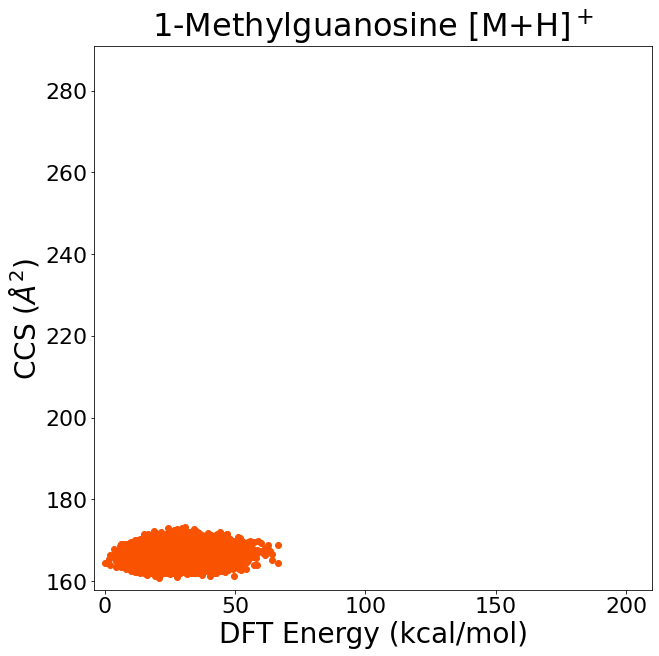

max-min =  50.72410000000002


max-min =  27.390199999999993


max-min =  15.413799999999995


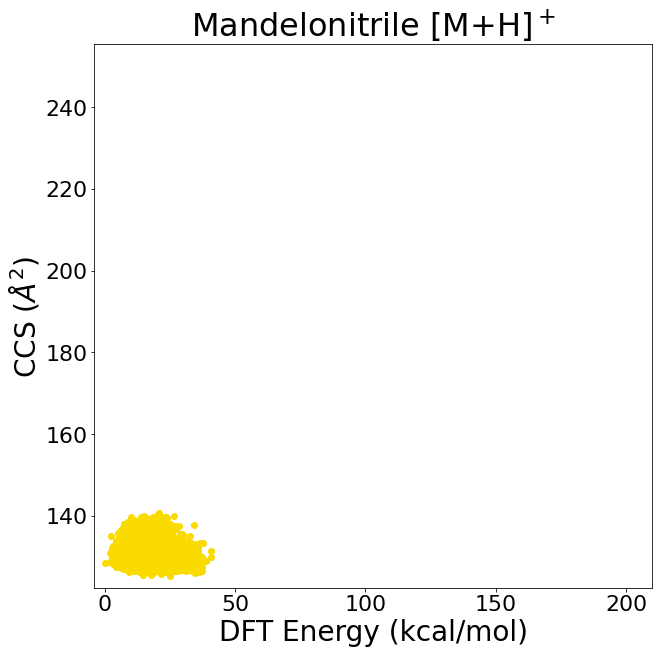

max-min =  10.359499999999997


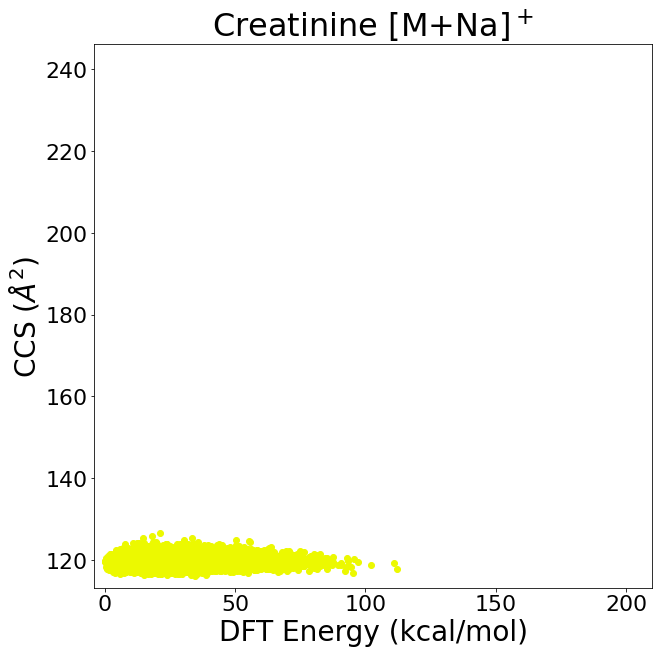

max-min =  17.05539999999999


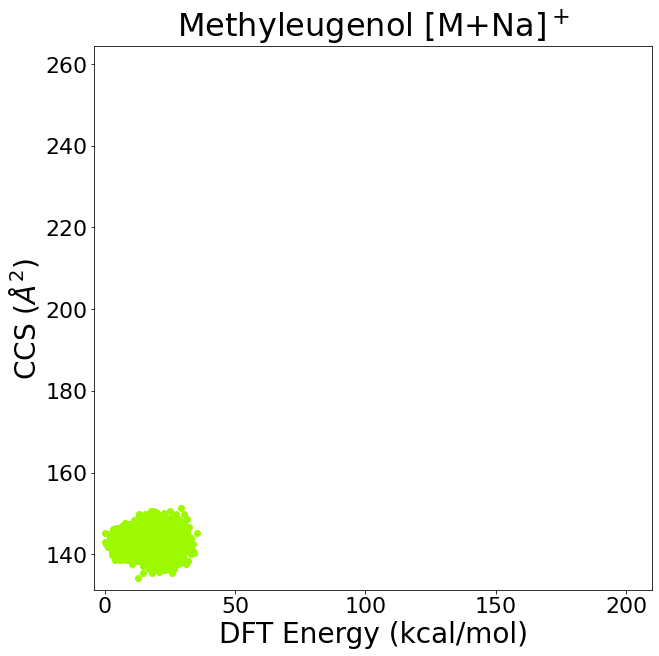

max-min =  12.895900000000012


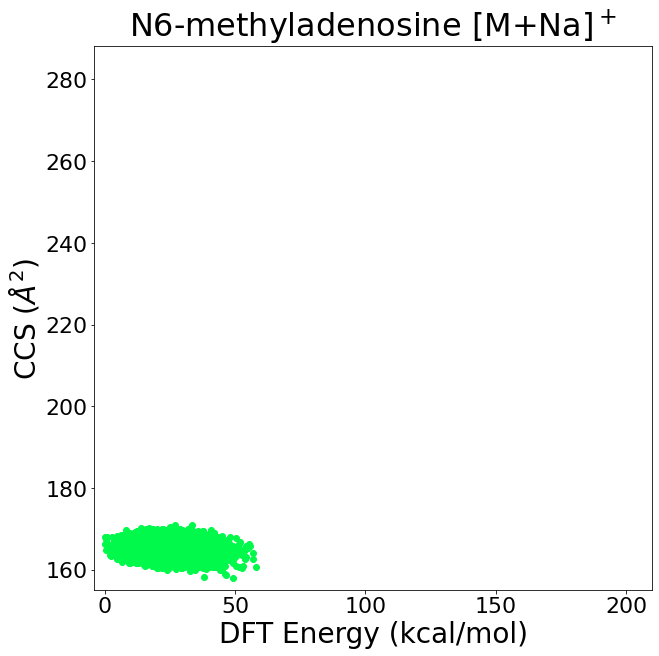

max-min =  14.802099999999996


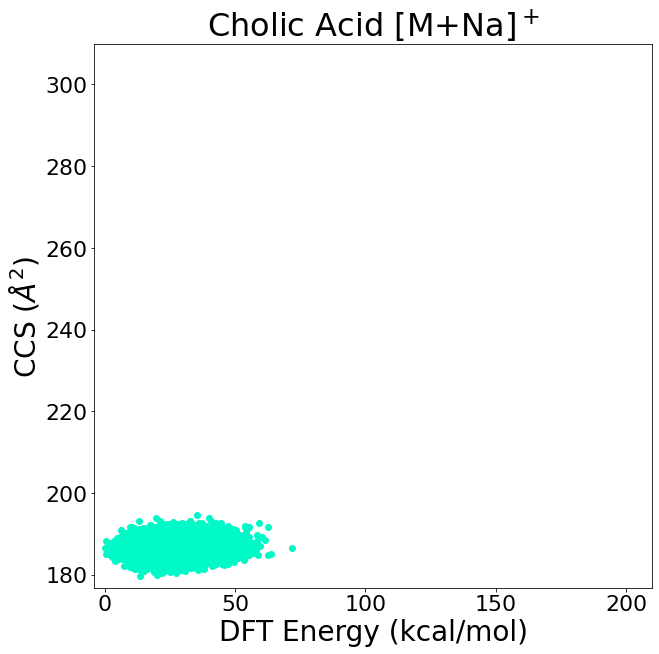

max-min =  34.47980000000001


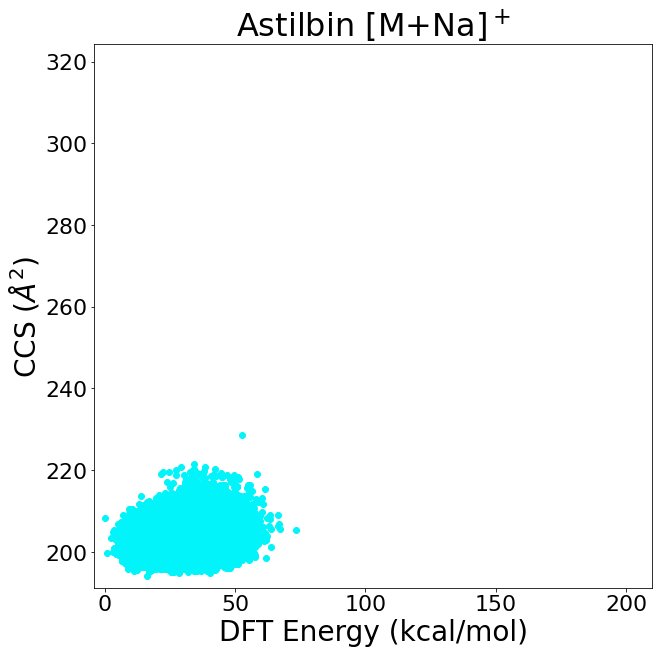

max-min =  45.54939999999999


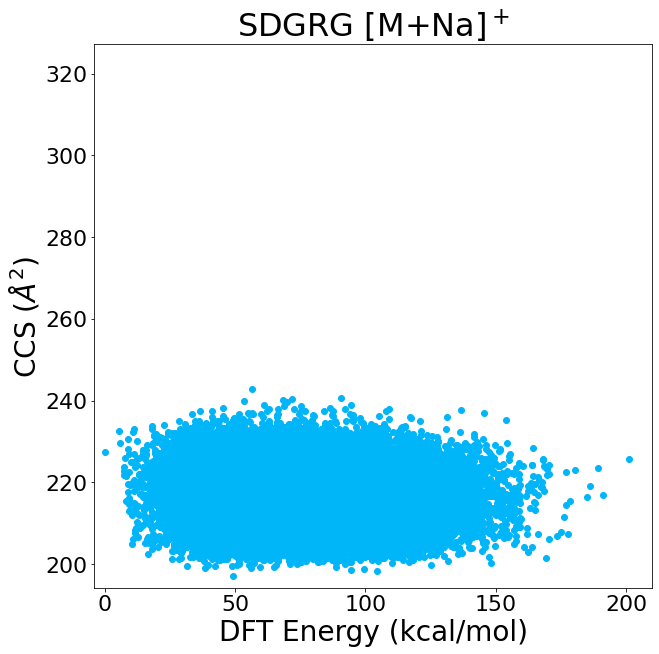

max-min =  46.417


max-min =  9.235600000000005


max-min =  10.950999999999993


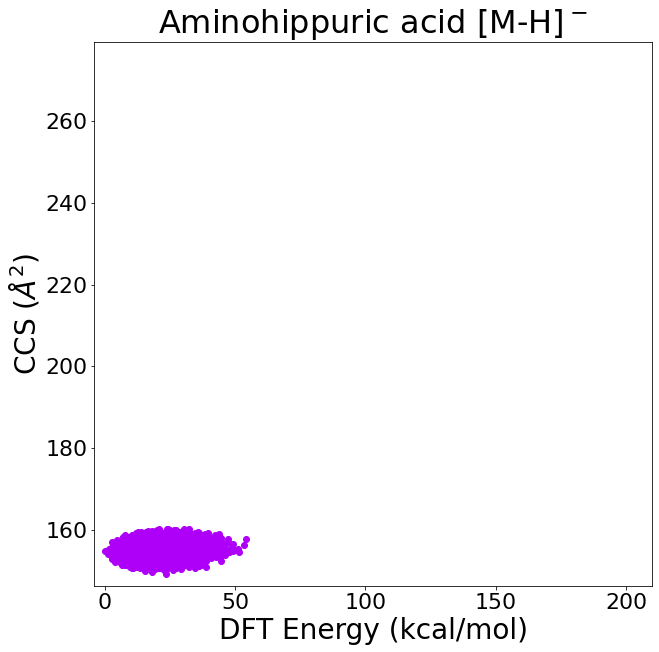

max-min =  23.770399999999995


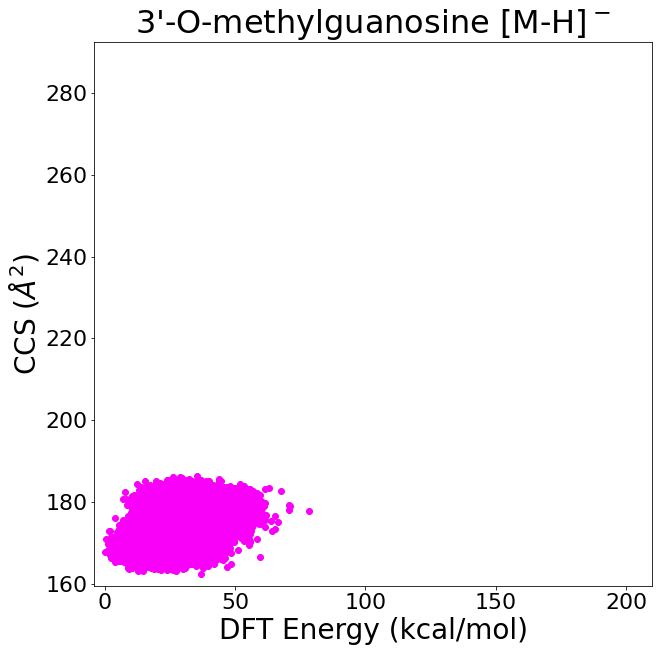

max-min =  18.504199999999997


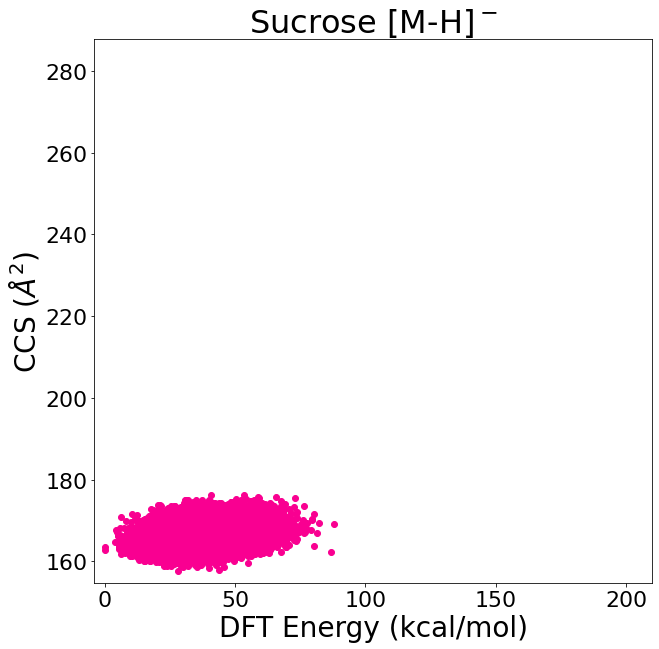

max-min =  36.02770000000001


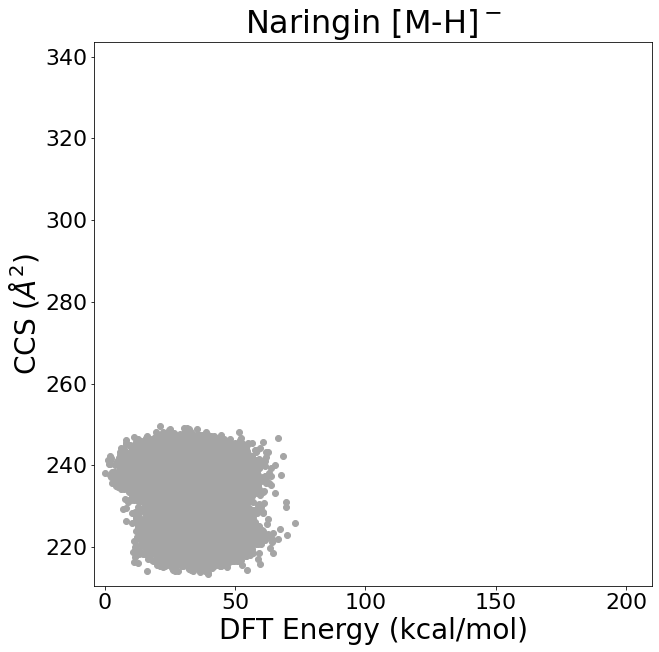

max-min =  128.25369999999998


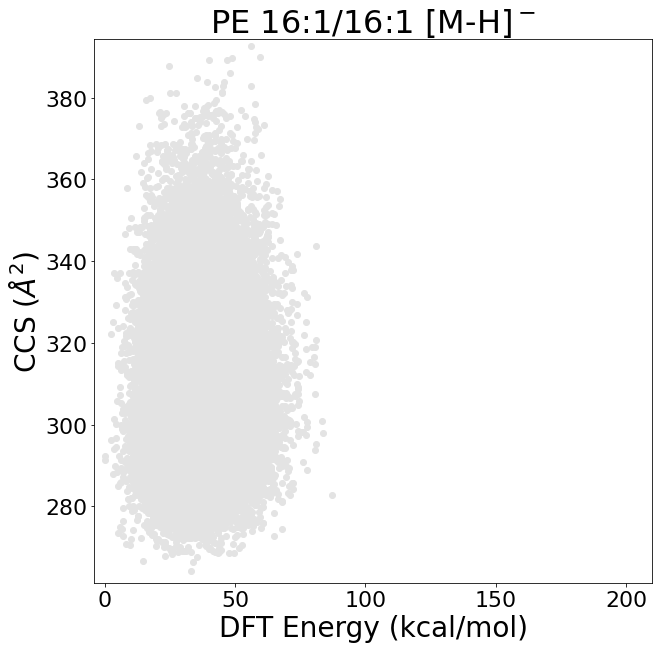

In [6]:
# Setting the DFT Energy scale from 0 to whatever
for i, ID in enumerate(molids):
    file = f'../data/molid{ID}_ccs.csv'
    
    if os.path.exists(file):
        pass
    else:
        continue    

    plt.figure(figsize=(10,10))
    plt.title(f'molid{ID}')        
    df = pd.read_csv(file)

    # Set the minimum energy to 0 and scale the rest accordingly.
    df['dft_energy'] *= 627.509
    mn = df['dft_energy'].min()
    df['dft_energy'] = df['dft_energy'] - mn
    
    # Plot with their hex colors, or plot with density (below)
    x = df['dft_energy']
    y = df['ccs']
    z = f'{hexs[i]}'
    
    # Uncomment to generate color by density
#     xy = np.vstack([x,y])
#     z = gaussian_kde(xy)(xy)
    
    plt.scatter(x, y, c=z) #, s=0.0001)
    print('max-min = ', y.max()-y.min())

    plt.ylim(y.min()-3, y.min()+130)
    plt.xlim(x.min()-4, x.min()+210)
    plt.ylabel('CCS ($\AA^2$)', fontsize=28)
    plt.xlabel('DFT Energy (kcal/mol)', fontsize=28)
    plt.tick_params(axis='both', which='major', labelsize=22)
    plt.title(f'{names[i]} [M{adducts[i]}]$^{adducts[i][0]}$', fontsize=32)
    plt.show()

### DFT Energy vs CCS, "clouds" with density  

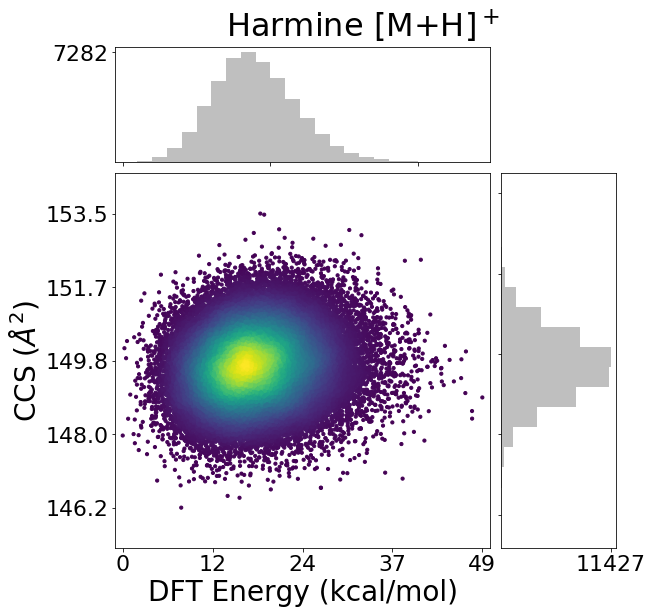

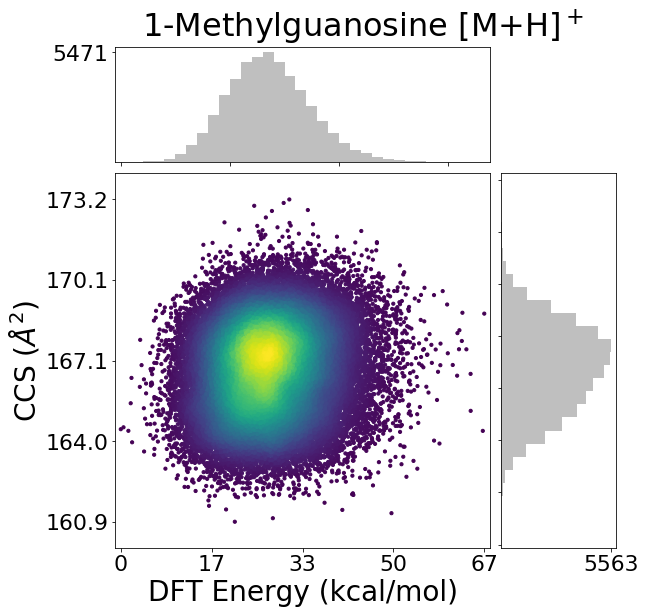

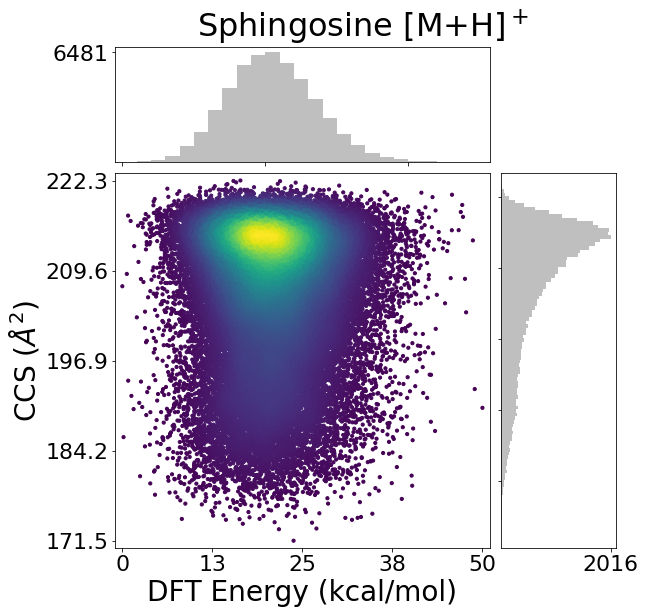

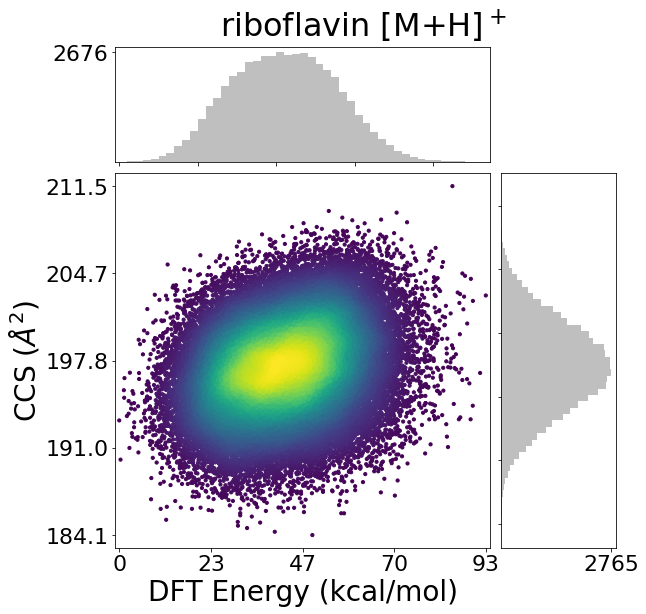

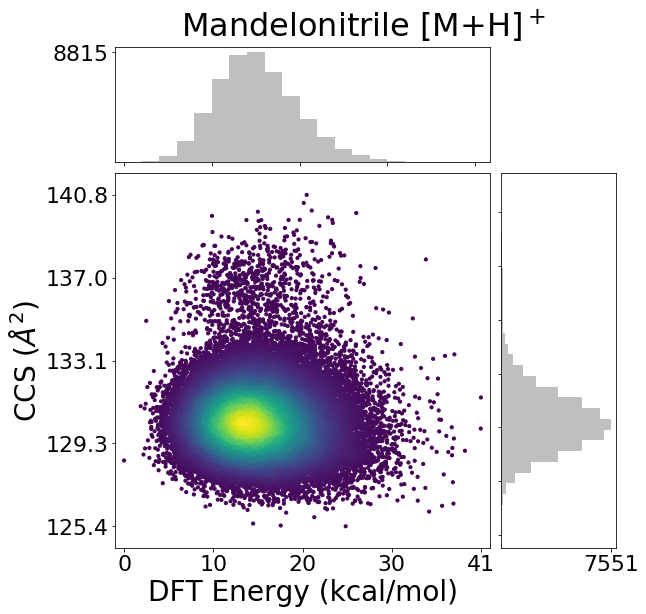

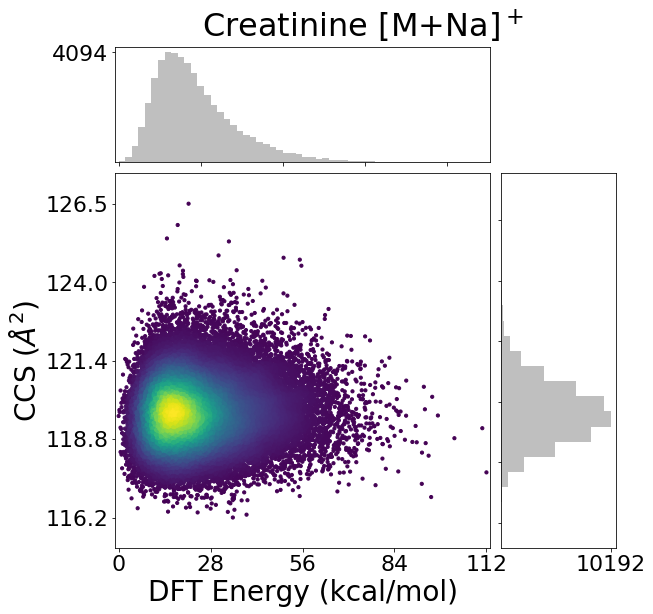

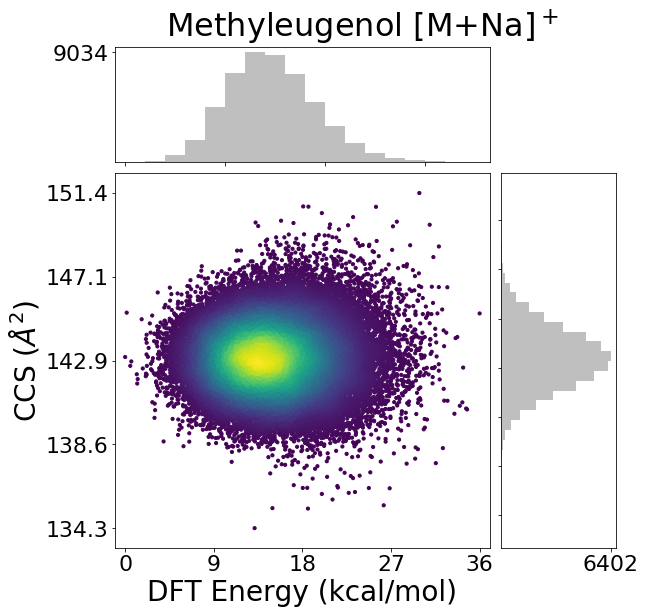

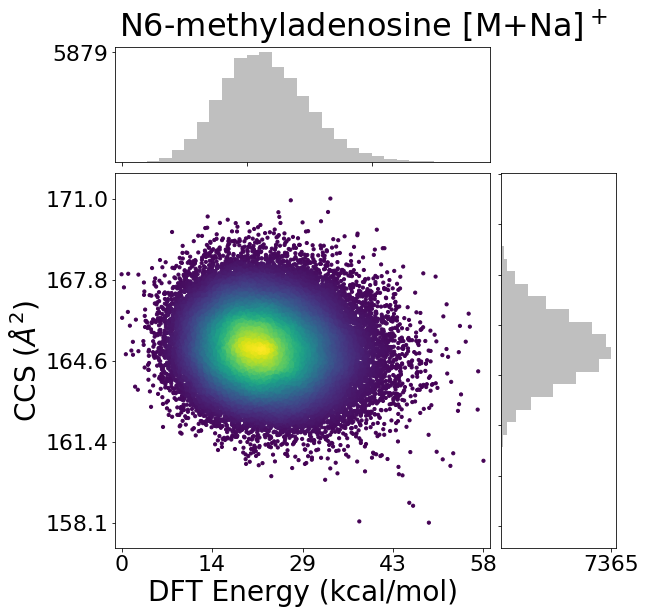

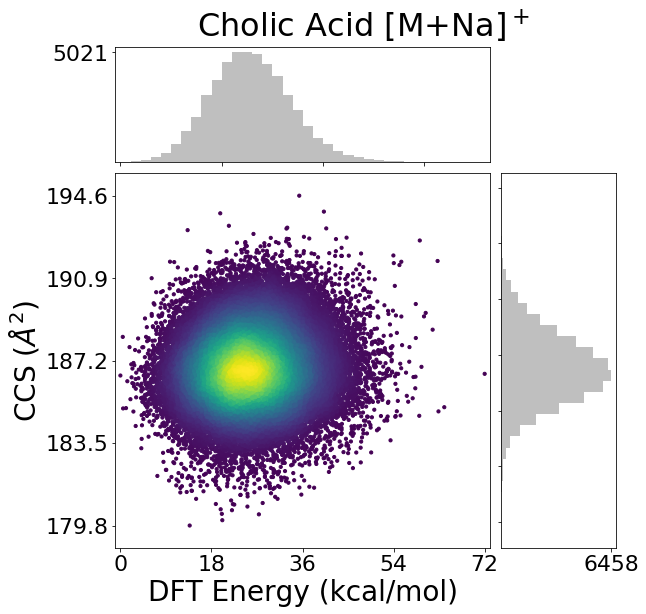

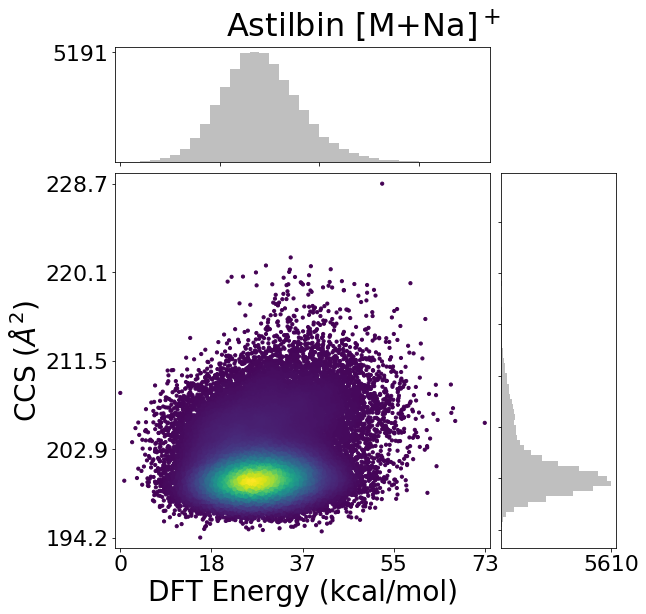

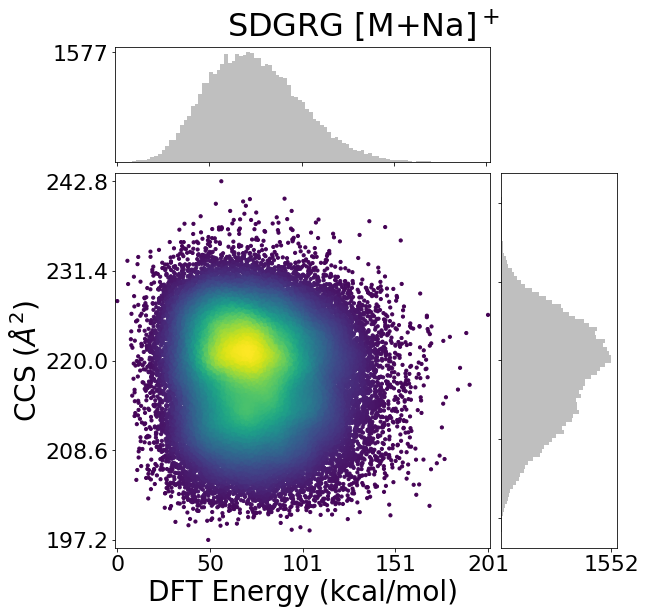

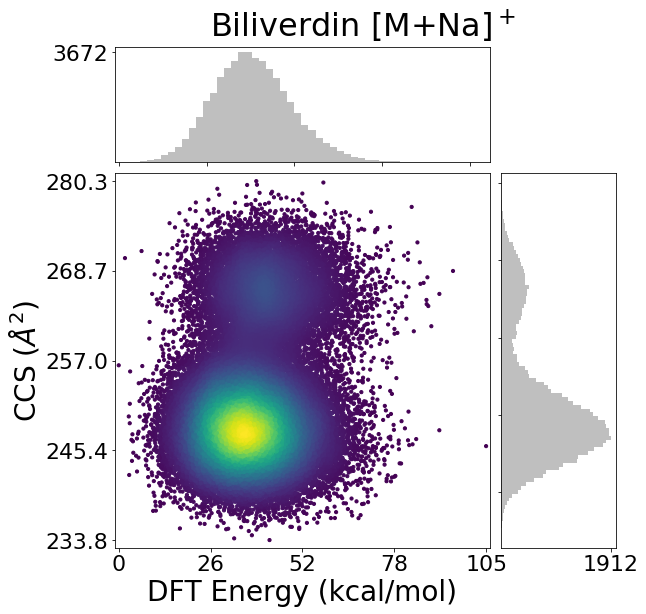

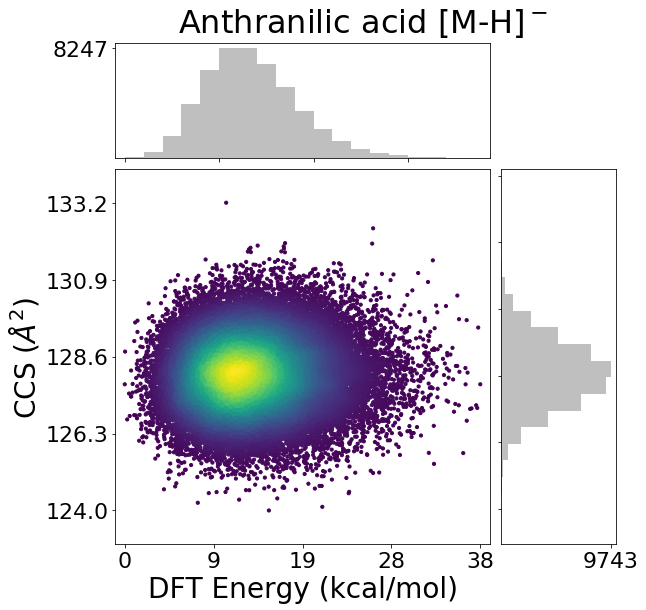

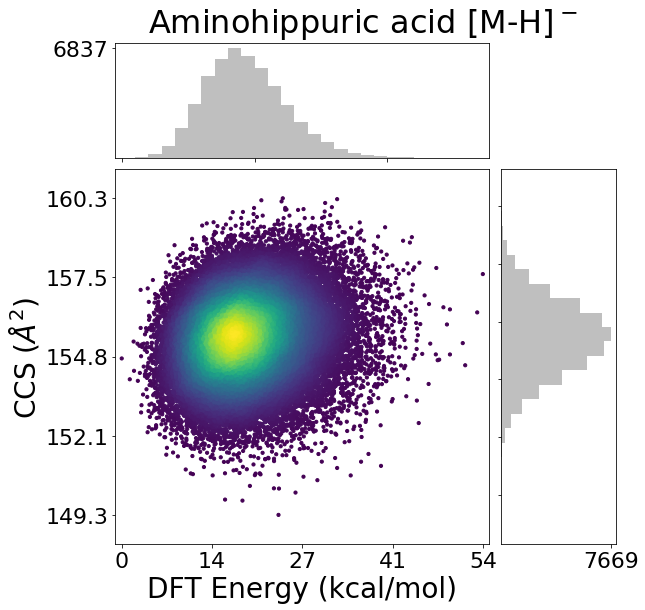

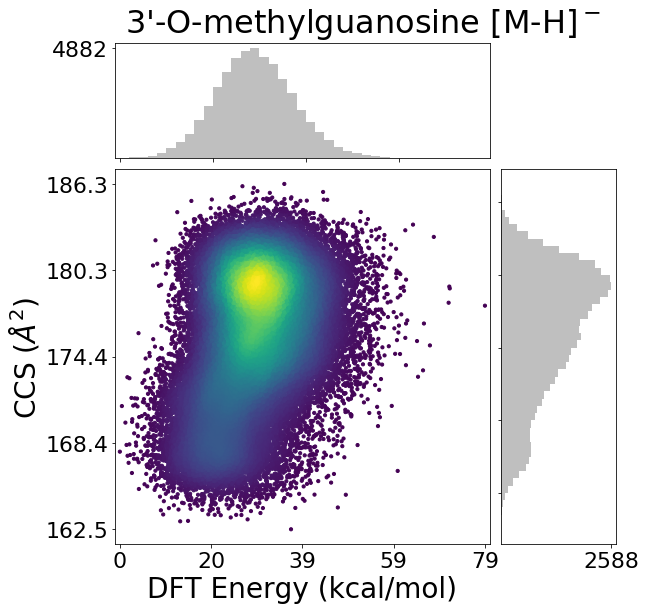

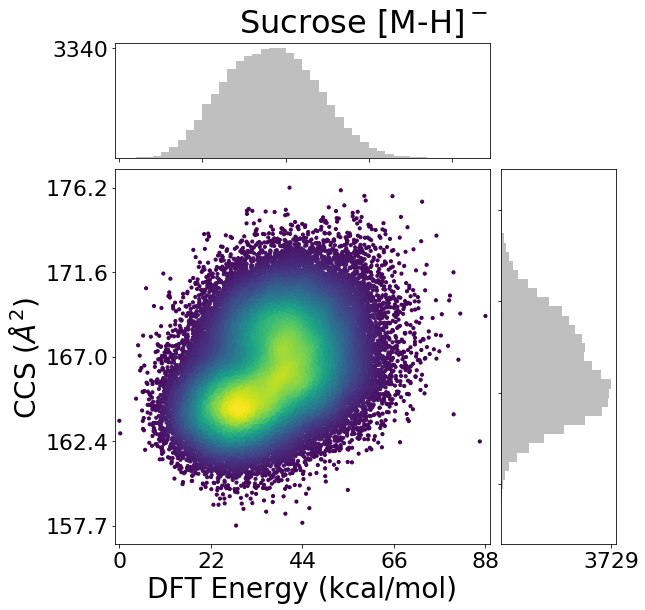

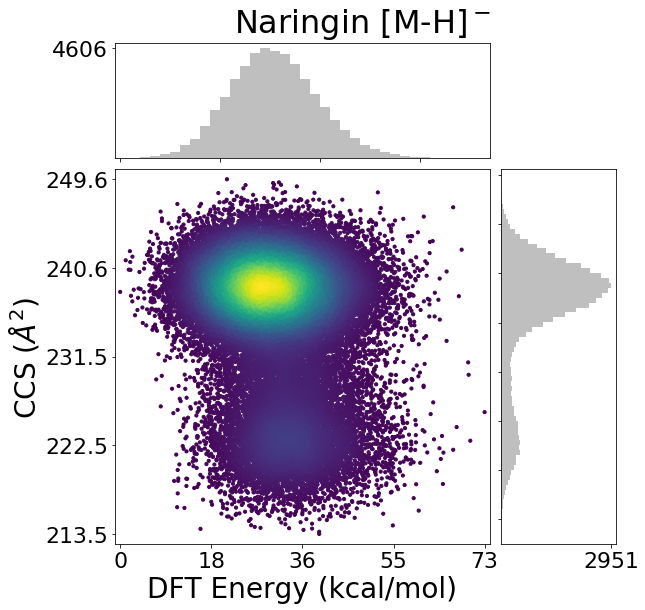

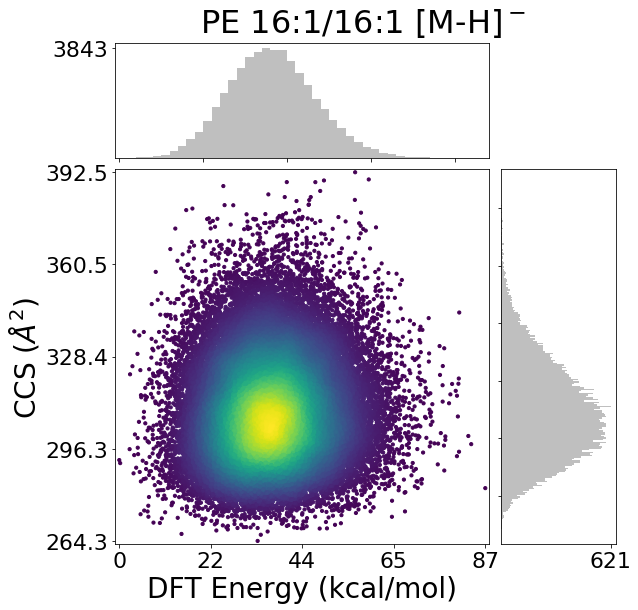

In [10]:
# Plot CCS v DFT energy
for d, ID in enumerate(molids):   
    file = f'../data/molid{ID}_ccs.csv'
    
    if os.path.exists(file):
        pass
    else:
        continue
        
    evc_df = pd.read_csv(file)
    
    # Set the minimum energy to 0 and scale the rest accordingly.
    # Comment these out to restore specific DFT energy values
    # Which are apparently mostly arbitrary, you can't compare them across molecules
    evc_df['dft_energy'] *= 627.509 # Convert hartree to kcal/mol 
    min = evc_df['dft_energy'].min()
    evc_df['dft_energy'] = evc_df['dft_energy'] - min
    
    x = evc_df['dft_energy']
    y = evc_df['ccs']

    nullfmt = NullFormatter()

    # Define the axes
    left, width = 0.1, 0.65
    bottom, height = 0.1, 0.65
    bottom_h = left_h = left + width + 0.02

    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom_h, width, 0.2]
    rect_histy = [left_h, bottom, 0.2, height]


    plt.figure(1, figsize=(8, 8))

    axScatter = plt.axes(rect_scatter)
    axHistx = plt.axes(rect_histx)
    axHisty = plt.axes(rect_histy)

    # no labels
    axHistx.xaxis.set_major_formatter(nullfmt)
    axHisty.yaxis.set_major_formatter(nullfmt)

    # Generate color by density
    xy = np.vstack([x,y])
    z = gaussian_kde(xy)(xy)
#    z = 'black'
    # the scatter plot:
    axScatter.scatter(x, y, c=z, s=10)

    binwidth = 0.25

    #axScatter.set_xlim((np.min(x)-0.0015,np.max(x)+0.0015))
    axScatter.set_xlim((np.min(x)-1,np.max(x)+1))
    axScatter.set_ylim((np.min(y)-1,np.max(y)+1))
    axScatter.set_ylabel('CCS ($\AA^2$)', fontsize=28)
    axScatter.set_xlabel('DFT Energy (kcal/mol)', fontsize=28)

    binwidthx = 2
    binwidthy = 0.5
    binx = np.arange(np.min(x), np.max(x), binwidthx)
    biny = np.arange(np.min(y), np.max(y), binwidthy)
    hxy, hxx, _ = axHistx.hist(x, bins=binx, color='#bfbfbf')
    hyy, hyx, _ = axHisty.hist(y, bins=biny, orientation='horizontal', color='#bfbfbf')

    axHistx.set_xlim(axScatter.get_xlim())
    axHisty.set_ylim(axScatter.get_ylim())
    #axHistx.set_xticklabels(x_ticks, rotation=0, fontsize=12)
    #axHisty.set_yticklabels(y_ticks, rotation=0, fontsize=2)


    # Adjust tick sizes and fonts
    axHistx.tick_params(axis='both', which='major', labelsize=22)
    axHisty.tick_params(axis='both', which='major', labelsize=22)
    axScatter.tick_params(axis='both', which='major', labelsize=22)

    axScatter.xaxis.set_major_formatter(FormatStrFormatter('%0.0f'))
    axScatter.yaxis.set_major_formatter(FormatStrFormatter('%0.1f'))


    #xtic = np.linspace(np.min(x)-0.01, np.max(x)+0.01, 3) # For using real DFT values
    xtic = np.linspace(np.min(x), np.max(x), 5)
    ytic = np.linspace(np.min(y), np.max(y), 5)
    axScatter.set_xticks(xtic)
    axScatter.set_yticks(ytic)

    axHistx.set_yticks([hxy.max()])
    axHisty.set_xticks([hyy.max()])
    
    plt.title(f'{names[d]} [M{adducts[d]}]$^{adducts[d][0]}$', fontsize=32, y=1.35, x=-1.2)
    plt.show()

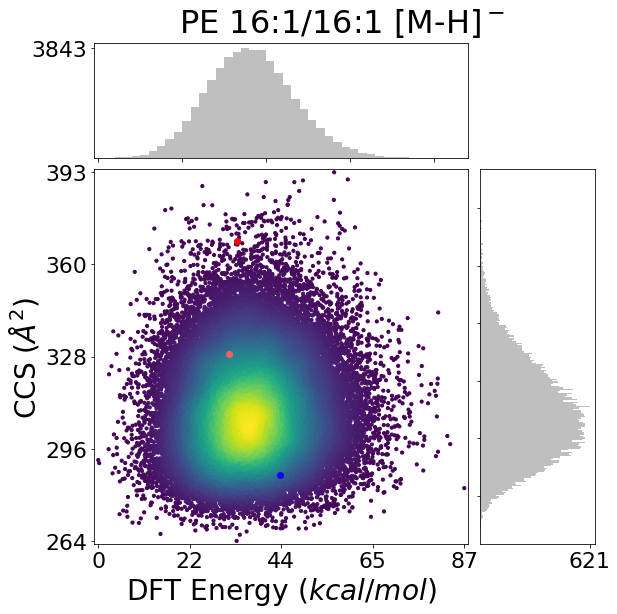

In [151]:
# Repeated cell from above for making official figures
# Plot CCS v DFT energy
start = 15 #17 #5
stop = 16 #18 #6
for d, ID in enumerate(molids[start:stop], start=start):
    file = f'../data/molid{ID}_ccs.csv'
    file2 = f'../data/molid{ID}_ccs_filled50k.csv'
    
    if os.path.exists(file):
        pass
    else:
        continue
        
    df = pd.read_csv(file)
    df2 = pd.read_csv(file2)
    
    # Set the minimum energy to 0 and scale the rest accordingly.
    # Comment these out to restore specific DFT energy values
    # Which are apparently mostly arbitrary, you can't compare them across molecules
    df['dft_energy'] *= 627.509 # Convert hartree to kcal/mol 
    mn = df['dft_energy'].min()
    df['dft_energy'] -= mn
    
    df2['dft_energy'] *= 627.509 
    df2['dft_energy'] -= mn    
    
    x = df['dft_energy']
    y = df['ccs']

    x2 = df2['dft_energy']
    y2 = df2['ccs']    
    
    nullfmt = NullFormatter()

    # Define the axes
    left, width = 0.1, 0.65
    bottom, height = 0.1, 0.65
    bottom_h = left_h = left + width + 0.02

    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom_h, width, 0.2]
    rect_histy = [left_h, bottom, 0.2, height]


    plt.figure(1, figsize=(8, 8))

    axScatter = plt.axes(rect_scatter)
    axHistx = plt.axes(rect_histx)
    axHisty = plt.axes(rect_histy)

    # no labels
    axHistx.xaxis.set_major_formatter(nullfmt)
    axHisty.yaxis.set_major_formatter(nullfmt)

    # Generate color by density
    xy = np.vstack([x,y])
    z = gaussian_kde(xy)(xy)
    #z = 'black'
    # the scatter plot:
    axScatter.scatter(x, y, c=z, s=10)

    binwidth = 0.25

    #axScatter.set_xlim((np.min(x)-0.0015,np.max(x)+0.0015))
    axScatter.set_xlim((np.min(x)-1,np.max(x)+1))
    axScatter.set_ylim((np.min(y)-1,np.max(y)+1))
    axScatter.set_ylabel('CCS ($\AA^2$)', fontsize=28)
    axScatter.set_xlabel('DFT Energy $\it{(kcal/mol)}$', fontsize=28)

    binwidthx = 2
    binwidthy = 0.5
    binx = np.arange(np.min(x), np.max(x), binwidthx)
    biny = np.arange(np.min(y), np.max(y), binwidthy)
    hxy, hxx, _ = axHistx.hist(x, bins=binx, color='#bfbfbf')
    hyy, hyx, _ = axHisty.hist(y, bins=biny, orientation='horizontal', color='#bfbfbf')

    axHistx.set_xlim(axScatter.get_xlim())
    axHisty.set_ylim(axScatter.get_ylim())
    #axHistx.set_xticklabels(x_ticks, rotation=0, fontsize=12)
    #axHisty.set_yticklabels(y_ticks, rotation=0, fontsize=2)


    # Adjust tick sizes and fonts
    axHistx.tick_params(axis='both', which='major', labelsize=22)
    axHisty.tick_params(axis='both', which='major', labelsize=22)
    axScatter.tick_params(axis='both', which='major', labelsize=22)

    axScatter.xaxis.set_major_formatter(FormatStrFormatter('%0.0f'))
    axScatter.yaxis.set_major_formatter(FormatStrFormatter('%0.0f'))


    #xtic = np.linspace(np.min(x)-0.01, np.max(x)+0.01, 3) # For using real DFT values
    xtic = np.linspace(np.min(x), np.max(x), 5)
    ytic = np.linspace(np.min(y), np.max(y), 5)
    axScatter.set_xticks(xtic)
    axScatter.set_yticks(ytic)

    axHistx.set_yticks([hxy.max()])
    axHisty.set_xticks([hyy.max()])
    
    # Now plot the energy division lines. Note that these are in kcal/mol,
     # shifted relative to the minimum energy which is set as 0
    #axScatter.axvline(0)
    #axScatter.axvline(5, color='red')
    #axScatter.axvline(2, color='red')
    #axScatter.axvline(1, color='red')
    #axScatter.axvline(0.5, color='red')
 
    # Plot the 1 most similar, 2 most dissimilar in red
    axScatter.scatter(x2[45221], y2[45221], c='#1403fc') #blue, most similar
    axScatter.scatter(x2[21225], y2[21225], c='#fc0303') #red
    axScatter.scatter(x2[42604], y2[42604], c='#ff5c5c') #lighter red
    
    # Index Key, ../data/nDisSimmSim/NDisConf_all_simple_average/molid* were originally used to find the indexes
    # blue, red, pink
    #20291,25675,41046 molid02
    #43825,9332,39791 molid11
    #3053,20880,30391 molid25
    #45221,21225,42604 molid29
    
    plt.title(f'{names[d]} [M{adducts[d]}]$^{adducts[d][0]}$', fontsize=32, y=1.35, x=-1.2)
    #plt.savefig(f'cloud-{names[d]}-1sim2dis.png', dpi=900, bbox_inches='tight')
    
    plt.show()


### Build panels for selection methods demo

02


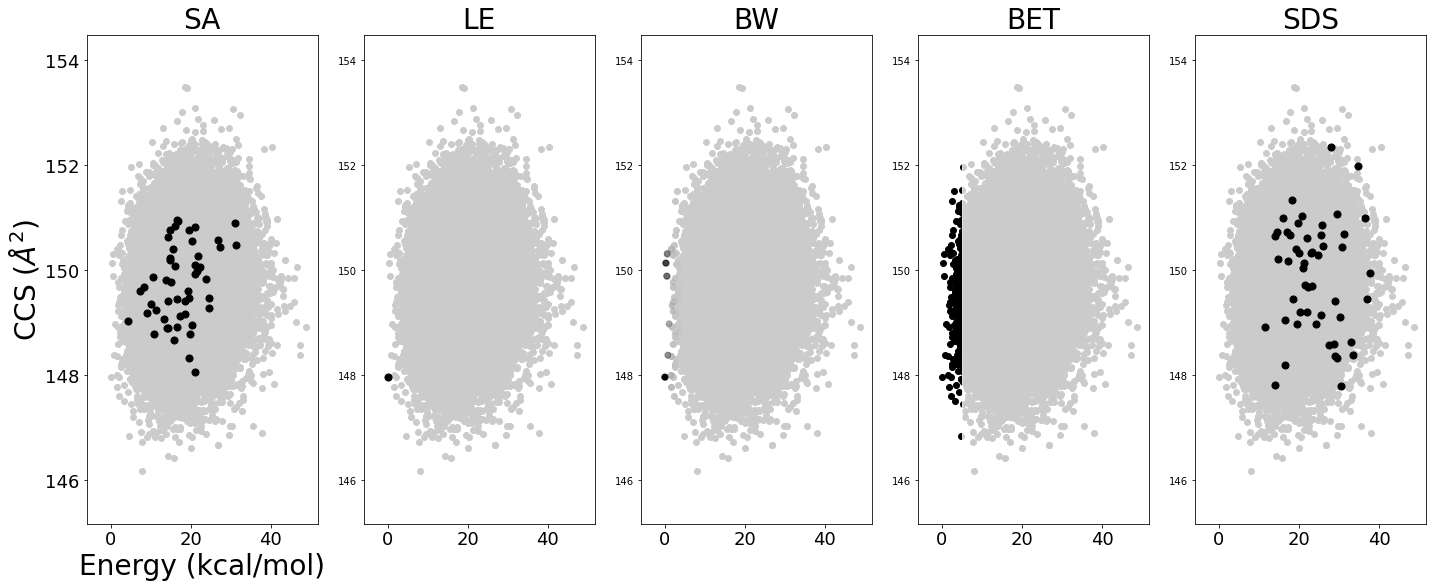

03


ValueError: 'c' argument has 49969 elements, which is inconsistent with 'x' and 'y' with size 50000.

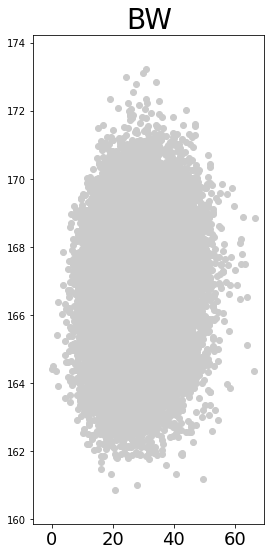

In [4]:
# Version 3.0

np.random.seed(0)

for d, ID in enumerate(molids[:], start=0):
    print(ID)
    #file = f'../data/molid{ID}_ccs.csv'
    file = f'../data/molid{ID}_ccs_filled50k.csv'
    
    if os.path.exists(file):
        pass
    else:
        continue
        
    
    # Set the minimum energy to 0 and scale the rest accordingly.
    df = pd.read_csv(file)
    df['dft_energy'] *= 627.509 # Convert hartree to kcal/mol 
    mn = df['dft_energy'].min()
    df['dft_energy'] = df['dft_energy'] - mn
    x = df['dft_energy']
    y = df['ccs']    
    
    xlim = [np.min(x)-6, np.max(x)+3]
    
        
    # Set global figure
    plt.figure(figsize=(24,9))
    
    ####------------
    # Plot BW
    z = '#cbcbcb'
    axBW = plt.subplot(1,5,3)
    axBW.scatter(x, y, c=z)
    axBW.set_xlim((xlim[0], xlim[1]))
    axBW.set_ylim((np.min(y)-1,np.max(y)+1))
    plt.title('BW', fontsize=28)
    #axBW.set_ylabel('CCS ($\AA^2$)', fontsize=28)
    #axBW.set_xlabel('DFT Energy (kcal/mol)', fontsize=28)
    plt.tick_params(axis='x', which='major', labelsize=18)
    #axBW.axes.get_yaxis().set_ticks([])
    
    weights = pd.read_csv(f'../data/molid{ID}_Bweights.csv')
    w = weights['Boltzmann Weight'].values
    rgba_colors = np.zeros((len(w),4))
    rgba_colors[:, 3] = w/w.max()
    axBW.scatter(x, y, color=rgba_colors)     
    
    
    ####------------
    # Plot LE
    z = 'black'
    axLE = plt.subplot(1,5,2)
    axLE.scatter(x, y, c=z)
    axLE.set_xlim((xlim[0], xlim[1]))
    axLE.set_ylim((np.min(y)-1,np.max(y)+1))
    plt.title('LE', fontsize=28)
    #axLE.set_ylabel('CCS ($\AA^2$)', fontsize=28)
    #axLE.set_xlabel('DFT Energy (kcal/mol)', fontsize=28)
    plt.tick_params(axis='x', which='major', labelsize=18)
    #axLE.axis('off') 
    #axLE.axes.get_yaxis().set_ticks([])
    #axLE.axes.yaxis.set_ticklabels([])
    
    index = x.idxmin()
    axLE.axvspan(axLE.get_xlim()[0], axLE.get_xlim()[1], alpha=0.8, color='white')
    axLE.scatter(x[index], y[index], c='black', s=50, zorder=2)
    
    
    ####------------
    # Plot BET
    axBET = plt.subplot(1,5,4) 
    axBET.scatter(x, y, c=z)
    axBET.set_xlim((xlim[0], xlim[1]))
    axBET.set_ylim((np.min(y)-1,np.max(y)+1))
    plt.title('BET', fontsize=28)
    #axBET.set_ylabel('CCS ($\AA^2$)', fontsize=28)
    #axBET.set_xlabel('DFT Energy (kcal/mol)', fontsize=28)     
    plt.tick_params(axis='x', which='major', labelsize=18)
    #axBET.axes.get_yaxis().set_ticks([])
    
    axBET.axvspan(5, axBET.get_xlim()[1], alpha=0.8, color='white') # 5 kcal/mol
        
        
    ####------------
    # Plot SDS
    axSDS = plt.subplot(1,5,5)
    axSDS.scatter(x, y, c=z)
    axSDS.set_xlim((xlim[0], xlim[1]))
    axSDS.set_ylim((np.min(y)-1,np.max(y)+1))
    plt.title('SDS', fontsize=28)
    plt.tick_params(axis='x', which='major', labelsize=18)
    #axLE.axis('off') 
    #axLE.axes.get_yaxis().set_ticks([])
    #axLE.axes.yaxis.set_ticklabels([])
    
    filesds = glob.glob(f'../data/SDS-sorted/{key[d]}*.csv')[0]
    dfsds = pd.read_csv(filesds)
    idxsds = [dfsds.loc[dfsds.index[-1]]['Conformer']]
    for i in range(50):
        idxsds.append(dfsds.loc[i]['Conformer'])
    axSDS.axvspan(axSDS.get_xlim()[0], axSDS.get_xlim()[1], alpha=0.8, color='white')
    axSDS.scatter(x[idxsds], y[idxsds], c='black', s=50, zorder=2)
        
        
    ####------------
    # Plot SA (aka random)
    axSA = plt.subplot(1,5,1)
    axSA.scatter(x, y, c=z)
    axSA.set_xlim((xlim[0], xlim[1]))
    axSA.set_ylim((np.min(y)-1,np.max(y)+1))
    plt.title('SA', fontsize=28)
    axSA.set_ylabel('CCS ($\AA^2$)', fontsize=28)
    axSA.set_xlabel('Energy (kcal/mol)', fontsize=28) #DFT Energy
    plt.tick_params(axis='both', which='major', labelsize=18)
    
    axSA.axvspan(axSA.get_xlim()[0], axSA.get_xlim()[1], alpha=0.8, color='white')
    rindex = np.random.choice(range(len(x)), 50, replace=False)
    axSA.scatter(x[rindex], y[rindex], c='black', s=50, zorder=2) 
    
    plt.show()

02


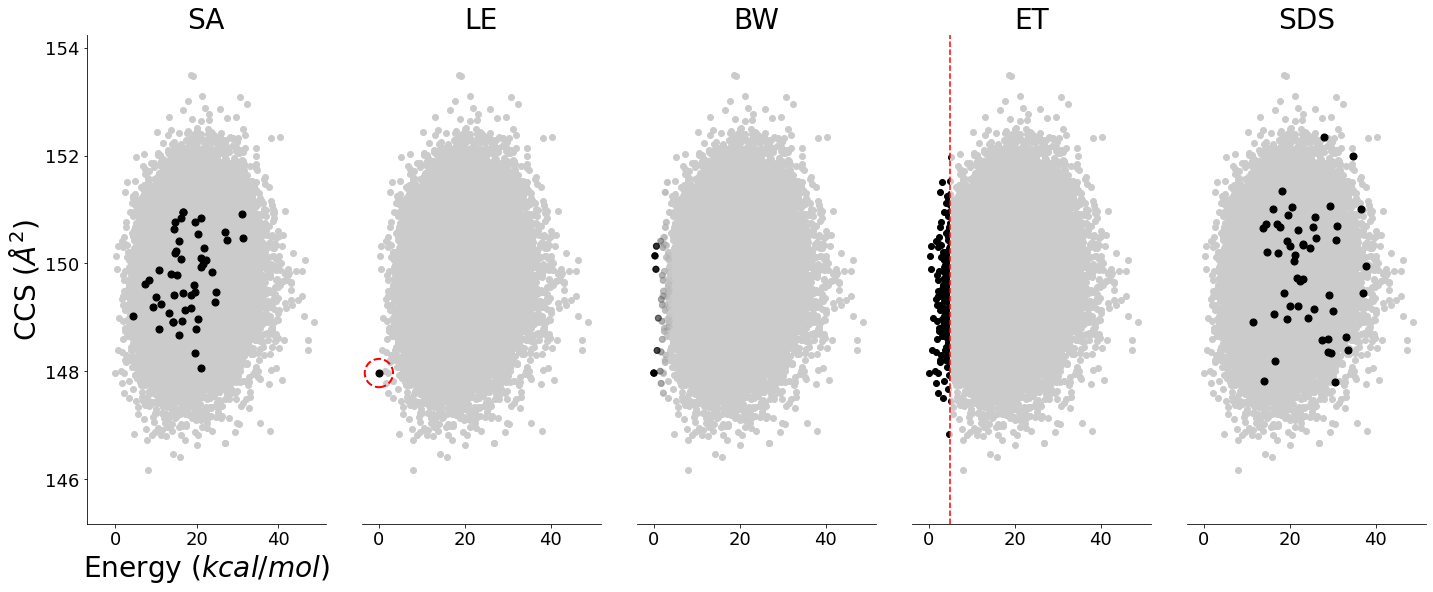

In [6]:
# Version 4.0

np.random.seed(0)

start = 0
stop = 1
for d, ID in enumerate(molids[start:stop], start=start):
    print(ID)
    #file = f'../data/molid{ID}_ccs.csv'
    file = f'../data/molid{ID}_ccs_filled50k.csv'
    
    if os.path.exists(file):
        pass
    else:
        continue
        
    
    # Set the minimum energy to 0 and scale the rest accordingly.
    df = pd.read_csv(file)
    df['dft_energy'] *= 627.509 # Convert hartree to kcal/mol 
    mn = df['dft_energy'].min()
    df['dft_energy'] = df['dft_energy'] - mn
    x = df['dft_energy']
    y = df['ccs']    
    
    xlim = [np.min(x)-4, np.max(x)+3]
    
        
    # Set global figure
    plt.figure(figsize=(24,9))
    plt.subplots_adjust(wspace=0.15, hspace=0.15)    
    
    ####------------
    # Plot BW
    z = '#cbcbcb'
    axBW = plt.subplot(1,5,3)
    axBW.scatter(x, y, c=z)
    axBW.set_xlim((xlim[0], xlim[1]))
    axBW.set_ylim((np.min(y)-1,np.max(y)+0.75))
    plt.title('BW', fontsize=28)
    #axBW.set_ylabel('CCS ($\AA^2$)', fontsize=28)
    #axBW.set_xlabel('DFT Energy (kcal/mol)', fontsize=28)
    plt.tick_params(axis='x', which='major', labelsize=18)
    #axBW.axes.get_yaxis().set_ticks([])
    
    weights = pd.read_csv(f'../data/molid{ID}_Bweights.csv')
    w = weights['Boltzmann Weight'].values
   # w = w#logscale the weights
    rgba_colors = np.zeros((len(w),4))
    rgba_colors[:, 3] = w/w.max()
    for i in range(3): 
        # Make it darker for presentation. We can do this since the color values
        # in the plots are not otherwise tied to a weight value (i.e. black is 1
        # the background light gray is 0, but dark gray is aribtrary so we can define it)
        axBW.scatter(x, y, color=rgba_colors) 
    
    # Make schematic level pretty
    axBW.get_yaxis().set_visible(False)
    axBW.spines["top"].set_visible(False)
    axBW.spines["right"].set_visible(False)
    axBW.spines["left"].set_visible(False)     
    
    
    ####------------
    # Plot LE
    z = 'black'
    axLE = plt.subplot(1,5,2)
    axLE.scatter(x, y, c=z)
    axLE.set_xlim((xlim[0], xlim[1]))
    axLE.set_ylim((np.min(y)-1,np.max(y)+0.75))
    plt.title('LE', fontsize=28)
    #axLE.set_ylabel('CCS ($\AA^2$)', fontsize=28)
    #axLE.set_xlabel('DFT Energy (kcal/mol)', fontsize=28)
    plt.tick_params(axis='x', which='major', labelsize=18)
    #axLE.axis('off') 
    #axLE.axes.get_yaxis().set_ticks([])
    #axLE.axes.yaxis.set_ticklabels([])
    
    index = x.idxmin()
    axLE.axvspan(axLE.get_xlim()[0], axLE.get_xlim()[1], alpha=0.8, color='white')
    axLE.scatter(x[index], y[index], c='black', s=50, zorder=2)
    axLE.scatter(x[index], y[index], facecolors='none', edgecolors='r', s=800, linewidths=2, linestyle='--', zorder=2)
    
    # Make schematic level pretty
    axLE.get_yaxis().set_visible(False)
    axLE.spines["top"].set_visible(False)
    axLE.spines["right"].set_visible(False)
    axLE.spines["left"].set_visible(False)    
    
    
    ####------------
    # Plot ET (formally BET)
    axET = plt.subplot(1,5,4) 
    axET.scatter(x, y, c=z)
    axET.set_xlim((xlim[0], xlim[1]))
    axET.set_ylim((np.min(y)-1,np.max(y)+0.75))
    plt.title('ET', fontsize=28)
    #axET.set_ylabel('CCS ($\AA^2$)', fontsize=28)
    #axET.set_xlabel('DFT Energy (kcal/mol)', fontsize=28)     
    plt.tick_params(axis='x', which='major', labelsize=18)
    #axET.axes.get_yaxis().set_ticks([])
    
    axET.axvspan(5, axET.get_xlim()[1], alpha=0.8, color='white') # 5 kcal/mol
    axET.axvline(5, color='red', linestyle='--')
    
    # Make schematic level pretty
    axET.get_yaxis().set_visible(False)
    axET.spines["top"].set_visible(False)
    axET.spines["right"].set_visible(False)
    axET.spines["left"].set_visible(False)    
        
        
    ####------------
    # Plot SDS
    axSDS = plt.subplot(1,5,5)
    axSDS.scatter(x, y, c=z)
    axSDS.set_xlim((xlim[0], xlim[1]))
    axSDS.set_ylim((np.min(y)-1,np.max(y)+0.75))
    plt.title('SDS', fontsize=28)
    plt.tick_params(axis='x', which='major', labelsize=18)
    #axLE.axis('off') 
    #axLE.axes.get_yaxis().set_ticks([])
    #axLE.axes.yaxis.set_ticklabels([])
    
    filesds = glob.glob(f'../data/SDS-sorted/{key[d]}*.csv')[0]
    dfsds = pd.read_csv(filesds)
    idxsds = [dfsds.loc[dfsds.index[-1]]['Conformer']]
    for i in range(50):
        idxsds.append(dfsds.loc[i]['Conformer'])
    axSDS.axvspan(axSDS.get_xlim()[0], axSDS.get_xlim()[1], alpha=0.8, color='white')
    axSDS.scatter(x[idxsds], y[idxsds], c='black', s=50, zorder=2)
    
    # Make schematic level pretty
    axSDS.get_yaxis().set_visible(False)
    axSDS.spines["top"].set_visible(False)
    axSDS.spines["right"].set_visible(False)
    axSDS.spines["left"].set_visible(False)
        
        
    ####------------
    # Plot SA (aka random)
    axSA = plt.subplot(1,5,1)
    axSA.scatter(x, y, c=z)
    axSA.set_xlim((xlim[0]-3, xlim[1]))
    axSA.set_ylim((np.min(y)-1,np.max(y)+0.75))
    plt.title('SA', fontsize=28)
    axSA.set_ylabel('CCS ($\AA^2$)', fontsize=28)
    axSA.set_xlabel('Energy $\it{(kcal/mol)}$', fontsize=28) #DFT Energy
    plt.tick_params(axis='both', which='major', labelsize=18)
    
    axSA.axvspan(axSA.get_xlim()[0], axSA.get_xlim()[1], alpha=0.8, color='white')
    rindex = np.random.choice(range(len(x)), 50, replace=False)
    axSA.scatter(x[rindex], y[rindex], c='black', s=50, zorder=2)
    
    # Make schematic level pretty
    axSA.spines["top"].set_visible(False)
    axSA.spines["right"].set_visible(False)
    #axSA.spines["left"].set_visible(False) 
    
    #plt.savefig('methods-schematic-v3.png', dpi=900, bbox='tight')
    plt.show()

### DFT Geometry optimized energies vs DFT energies (on AMBER structures), for creatinine (molid11)  

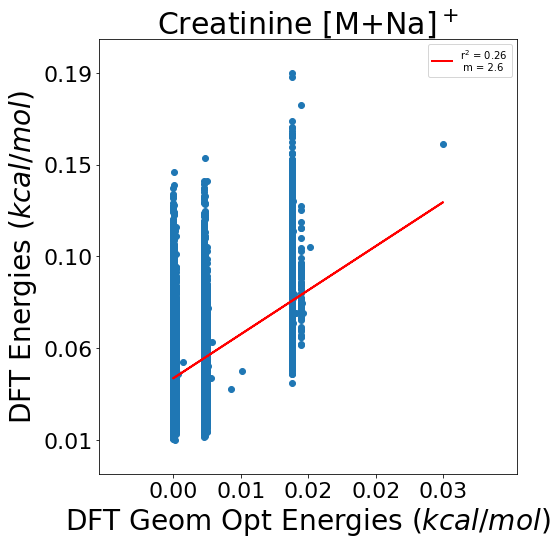

In [57]:
dfe = pd.read_csv('../data/molid11_ccs.csv')
dfg = pd.read_csv('../data/molid11_dgo_ccs.csv')

dfboth = dfg.merge(dfe, on=['cycle', 'geometry']) # x is geom opt, y is e opt only

fig = plt.figure(1, figsize=(8, 8))
ax = fig.add_subplot(111)


x = dfboth['dft_energy_x']
y = dfboth['dft_energy_y']

# Make energies relative to minimum
mn = x.min()
x -= mn
y -= mn


plt.scatter(x, y, label=None)

plt.title('Creatinine [M+Na]$^+$', fontsize=30)
plt.ylabel('DFT Energies $\it{(kcal/mol)}$', fontsize=28)
plt.xlabel('DFT Geom Opt Energies $\it{(kcal/mol)}$', fontsize=28)

ytic = np.linspace(y.min(), y.max(), 5)
xtic = np.linspace(x.min(), x.max(), 5)
plt.yticks(ytic)
plt.xticks(xtic)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
plt.tick_params(axis='both', which='major', labelsize=22)

# Plot the Linear regression line
lr = linregress(x,y)
m = lr[0]
r2 = lr[2]**2

x_vals = x.values.reshape(-1, 1)
y_vals = y.values.reshape(-1, 1)
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(x_vals, y_vals)  # perform linear regression
y_pred = linear_regressor.predict(x_vals)     

plt.plot(x_vals, y_pred, color='r', linestyle='-', linewidth=2,
         label=f'r$^2$ = {np.round(r2, decimals=2)} \n m = {np.round(m, decimals=2)}')
plt.legend() 

plt.gcf().subplots_adjust(left=0.175)
#plt.savefig('dftE-vs-dftGOE-creatinine.png', dpi=600)


### DFT Geometry optimized energies vs DFT energies (on AMBER structures), for sucrose (molid25)  

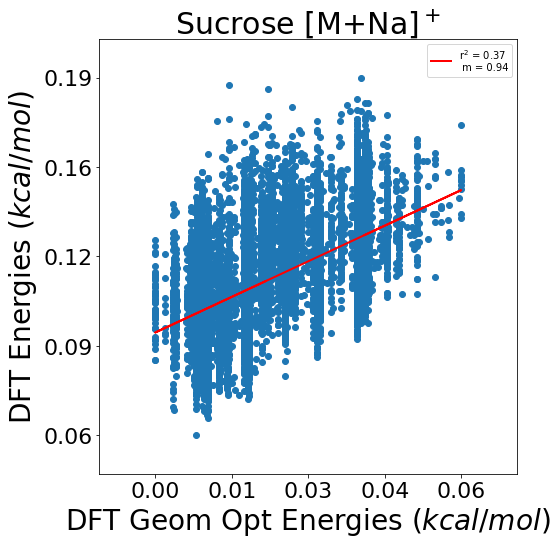

In [52]:
dfe = pd.read_csv('../data/molid25_ccs.csv')
dfg = pd.read_csv('../data/molid25_dgo_ccs.csv')

dfboth = dfg.merge(dfe, on=['cycle', 'geometry']) # x is geom opt, y is e opt only

fig = plt.figure(1, figsize=(8, 8))
ax = fig.add_subplot(111)

x = dfboth['dft_energy_x']
y = dfboth['dft_energy_y']


# Make energies relative to minimum
mn = x.min()
x -= mn
y -= mn


plt.scatter(x, y, label=None)

plt.title('Sucrose [M+Na]$^+$', fontsize=30)
plt.ylabel('DFT Energies $\it{(kcal/mol)}$', fontsize=28)
plt.xlabel('DFT Geom Opt Energies $\it{(kcal/mol)}$', fontsize=28)

ytic = np.linspace(y.min(), 
                   y.max(),
                   5)

xtic = np.linspace(x.min(), 
                   x.max(),
                   5)
plt.yticks(ytic)
plt.xticks(xtic)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
plt.tick_params(axis='both', which='major', labelsize=22)

# Plot the Linear regression line
lr = linregress(x,y)
m = lr[0]
r2 = lr[2]**2

x_vals = x.values.reshape(-1, 1)
y_vals = y.values.reshape(-1, 1)
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(x_vals, y_vals)  # perform linear regression
y_pred = linear_regressor.predict(x_vals)     

plt.plot(x_vals, y_pred, color='r', linestyle='-', linewidth=2,
         label=f'r$^2$ = {np.round(r2, decimals=2)} \n m = {np.round(m, decimals=2)}')

plt.legend()    

plt.gcf().subplots_adjust(left=0.175)
#plt.savefig('dftE-vs-dftGOE-sucrose.png', dpi=600, bbox='tight')


### DFT Geometry optimized energies vs DFT energies (on AMBER structures), for mandelonitrile (molid10)  

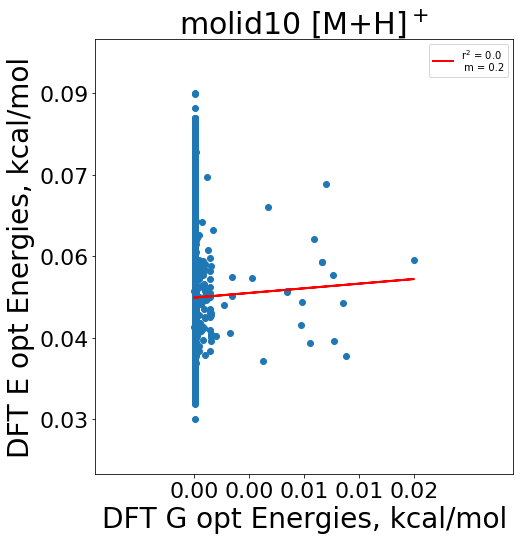

In [60]:
dfe = pd.read_csv('../data/molid10_ccs.csv')
dfg = pd.read_csv('../data/molid10_dgo_ccs.csv')

dfboth = dfg.merge(dfe, on=['cycle', 'geometry']) # x is geom opt, y is e opt only

fig = plt.figure(1, figsize=(8, 8))
ax = fig.add_subplot(111)

x = dfboth['dft_energy_x']
y = dfboth['dft_energy_y']


# Make energies relative to minimum
mn = x.min()
x -= mn
y -= mn
plt.scatter(x, y, label=None)

plt.title('molid10 [M+H]$^+$', fontsize=30)
plt.ylabel('DFT E opt Energies, kcal/mol', fontsize=28)
plt.xlabel('DFT G opt Energies, kcal/mol', fontsize=28)

ytic = np.linspace(y.min(), y.max(), 5)
xtic = np.linspace(x.min(), x.max(), 5)
plt.yticks(ytic)
plt.xticks(xtic)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
plt.tick_params(axis='both', which='major', labelsize=22)

# Plot the Linear regression line
lr = linregress(x,y)
m = lr[0]
r2 = lr[2]**2

x_vals = x.values.reshape(-1, 1)
y_vals = y.values.reshape(-1, 1)
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(x_vals, y_vals)  # perform linear regression
y_pred = linear_regressor.predict(x_vals)     

plt.plot(x_vals, y_pred, color='r', linestyle='-', linewidth=2,
         label=f'r$^2$ = {np.round(r2, decimals=2)} \n m = {np.round(m, decimals=2)}')

plt.legend()    

plt.gcf().subplots_adjust(left=0.175)
#plt.savefig('dftE-vs-dftGOE-mandelonitrile.png', dpi=600, bbox='tight'

### checking if AMBER cycles cluster or not  

1


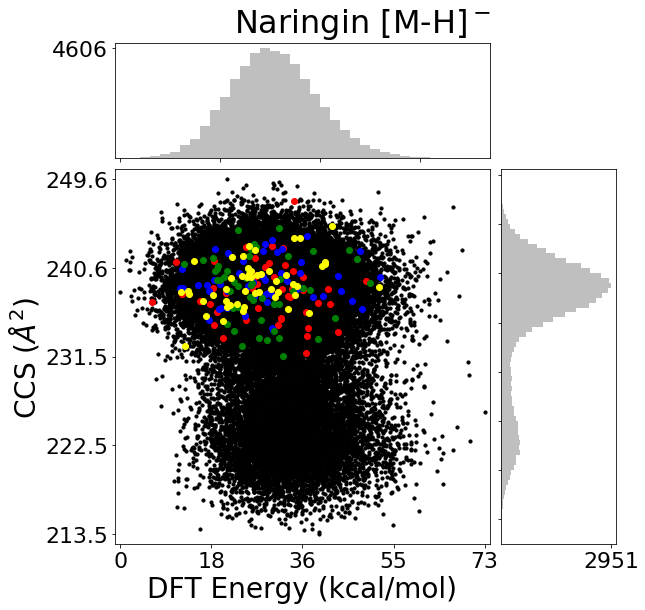

101


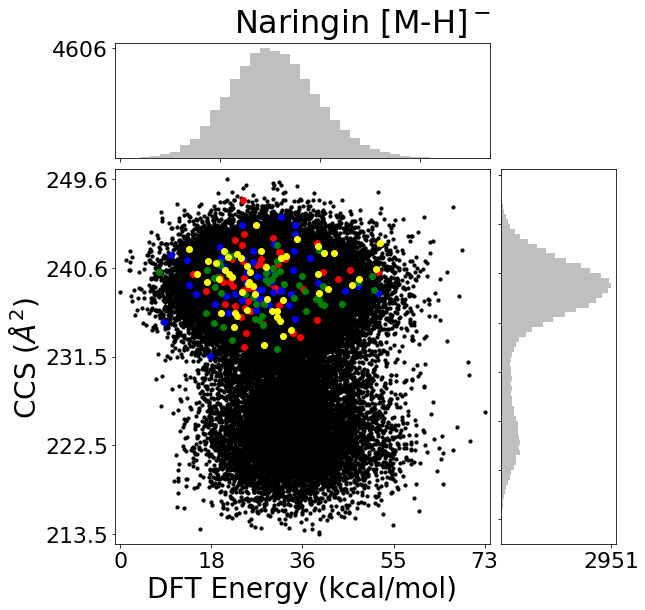

201


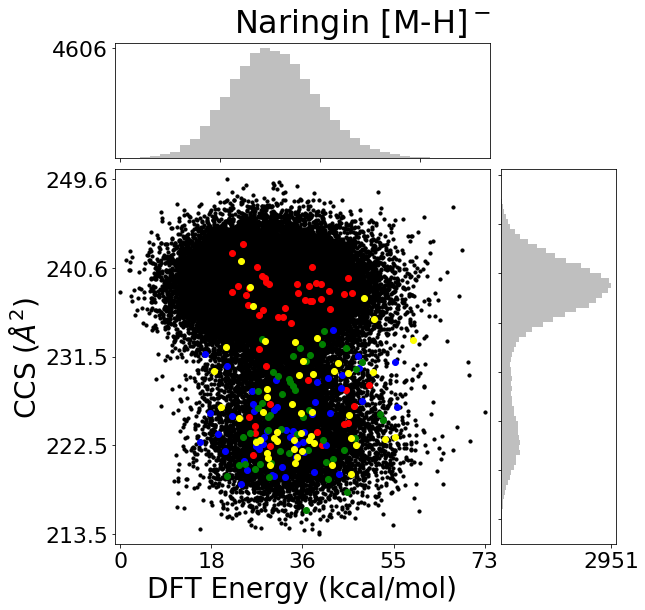

301


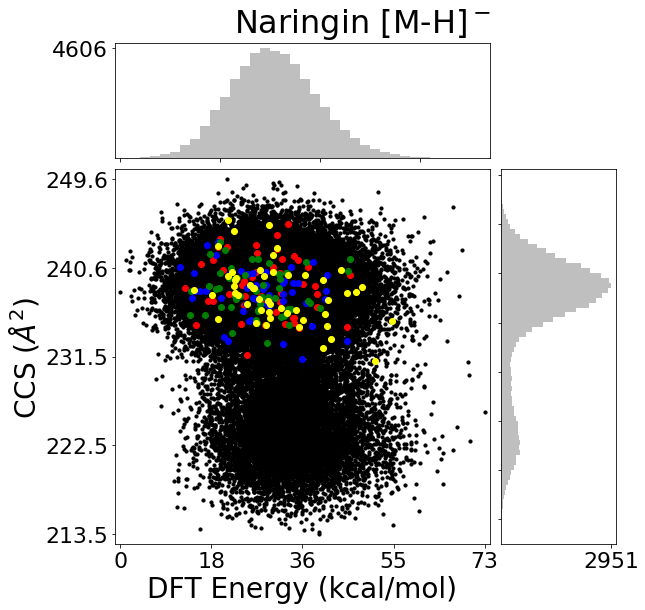

401


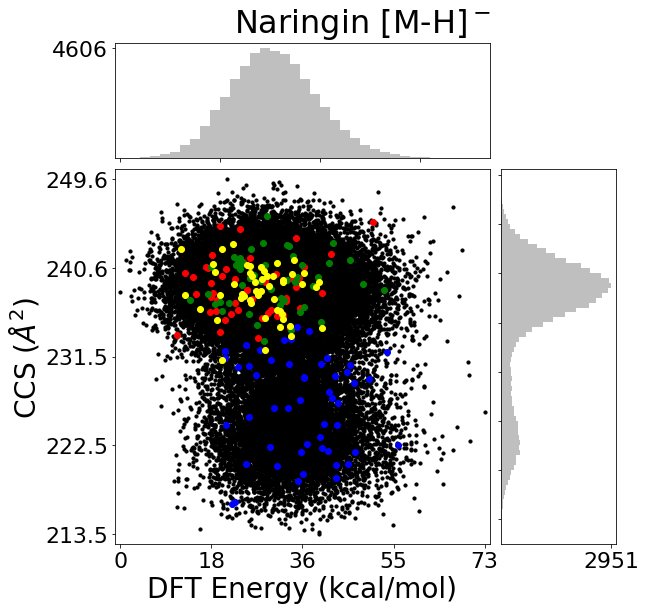

501


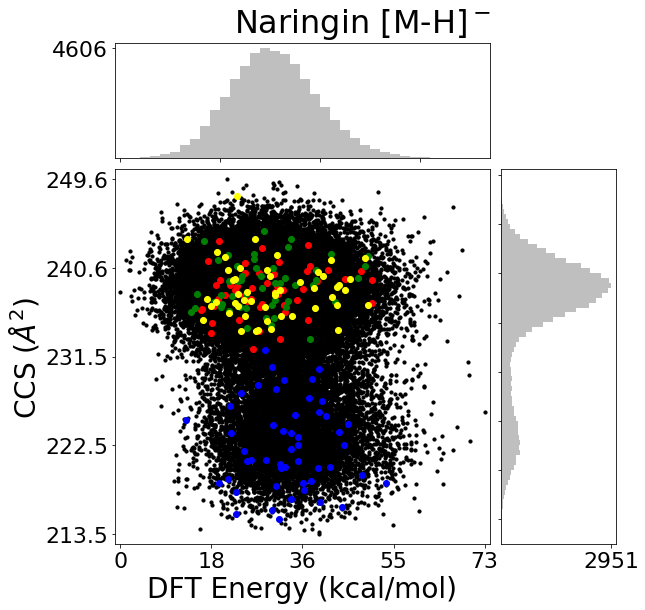

601


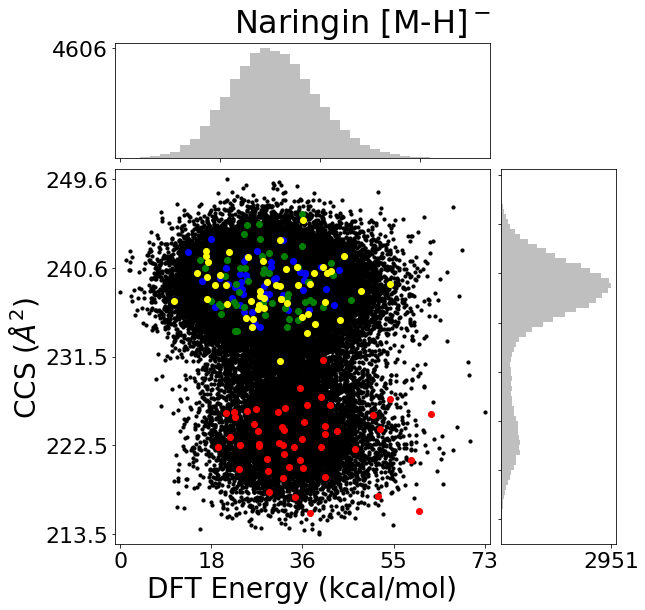

701


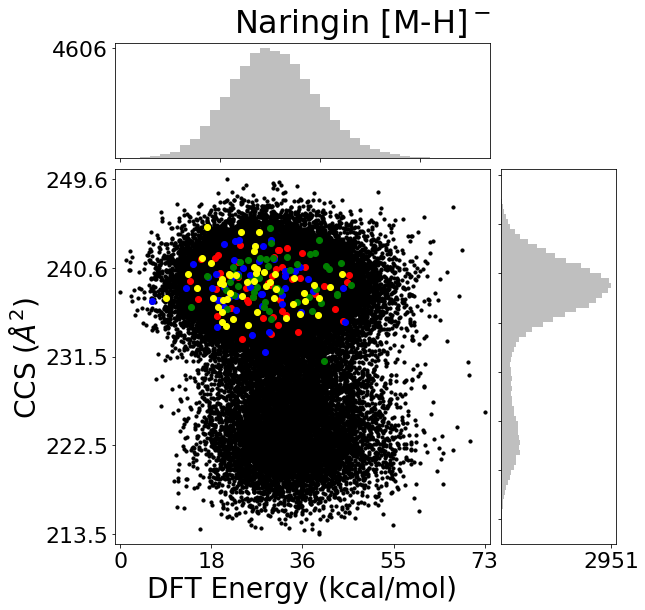

801


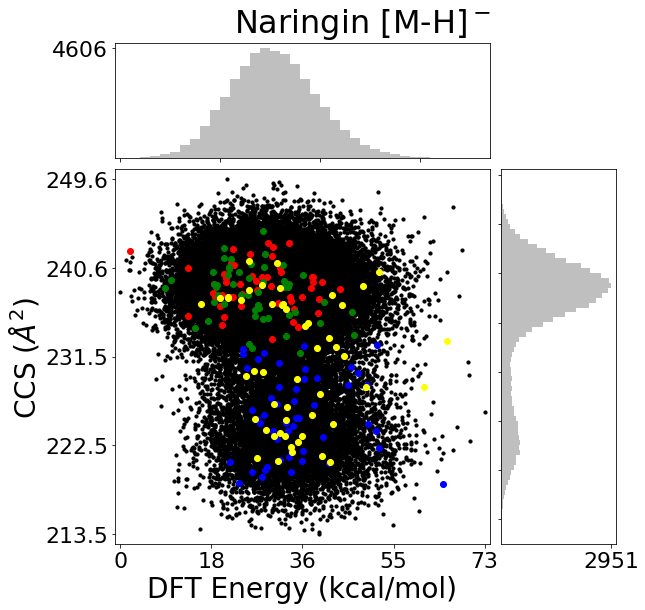

901


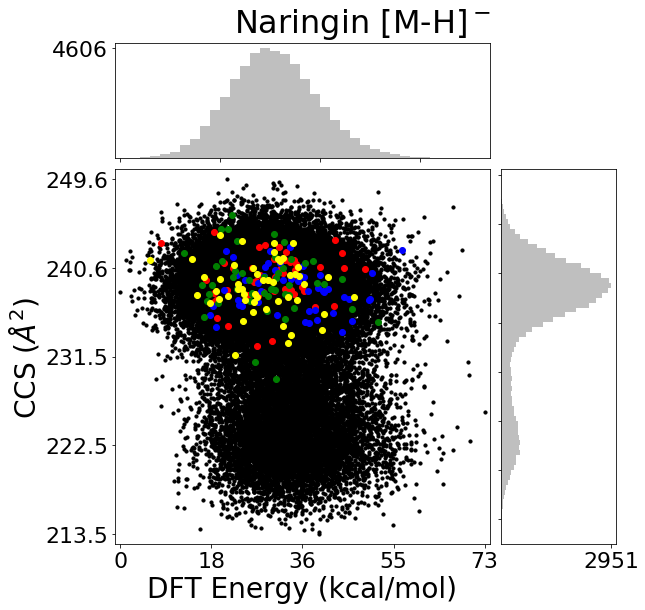

1001


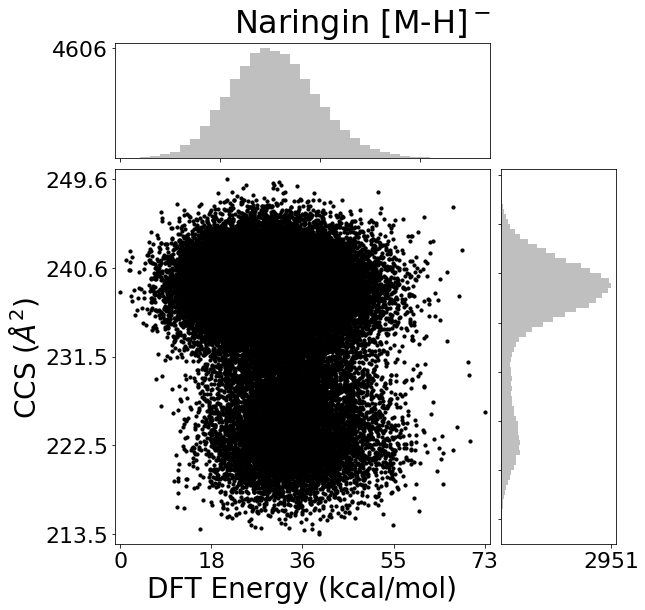

In [15]:
step = 100
cycles = np.arange(1, 1000+step, step)
for cycle in cycles:
    
    # Plot CCS v DFT energy
    d = 16   # look at 3, 9, 10, 11 <-- fo sure, 15, 16, 17
    for ID in molids[d:d+1]:  
        file = f'../data/molid{ID}_ccs.csv'

        if os.path.exists(file):
            pass
        else:
            continue

        df = pd.read_csv(file)

        # Set the minimum energy to 0 and scale the rest accordingly.
        # Comment these out to restore specific DFT energy values
        # Which are apparently mostly arbitrary, you can't compare them across molecules
        df['dft_energy'] *= 627.509 # Convert hartree to kcal/mol 
        mn = df['dft_energy'].min()
        df['dft_energy'] = df['dft_energy'] - mn

        x = df['dft_energy']
        y = df['ccs']

        nullfmt = NullFormatter()

        # Define the axes
        left, width = 0.1, 0.65
        bottom, height = 0.1, 0.65
        bottom_h = left_h = left + width + 0.02

        rect_scatter = [left, bottom, width, height]
        rect_histx = [left, bottom_h, width, 0.2]
        rect_histy = [left_h, bottom, 0.2, height]


        plt.figure(1, figsize=(8, 8))

        axScatter = plt.axes(rect_scatter)
        axHistx = plt.axes(rect_histx)
        axHisty = plt.axes(rect_histy)

        # no labels
        axHistx.xaxis.set_major_formatter(nullfmt)
        axHisty.yaxis.set_major_formatter(nullfmt)

        # Generate color by density
    #    xy = np.vstack([x,y])
    #    z = gaussian_kde(xy)(xy)
        z = 'black'
        # the scatter plot:
        axScatter.scatter(x, y, c=z, s=10)

        binwidth = 0.25

        #axScatter.set_xlim((np.min(x)-0.0015,np.max(x)+0.0015))
        axScatter.set_xlim((np.min(x)-1,np.max(x)+1))
        axScatter.set_ylim((np.min(y)-1,np.max(y)+1))
        axScatter.set_ylabel('CCS ($\AA^2$)', fontsize=28)
        axScatter.set_xlabel('DFT Energy (kcal/mol)', fontsize=28)

        binwidthx = 2
        binwidthy = 0.5
        binx = np.arange(np.min(x), np.max(x), binwidthx)
        biny = np.arange(np.min(y), np.max(y), binwidthy)
        hxy, hxx, _ = axHistx.hist(x, bins=binx, color='#bfbfbf')
        hyy, hyx, _ = axHisty.hist(y, bins=biny, orientation='horizontal', color='#bfbfbf')

        axHistx.set_xlim(axScatter.get_xlim())
        axHisty.set_ylim(axScatter.get_ylim())
        #axHistx.set_xticklabels(x_ticks, rotation=0, fontsize=12)
        #axHisty.set_yticklabels(y_ticks, rotation=0, fontsize=2)


        # Adjust tick sizes and fonts
        axHistx.tick_params(axis='both', which='major', labelsize=22)
        axHisty.tick_params(axis='both', which='major', labelsize=22)
        axScatter.tick_params(axis='both', which='major', labelsize=22)

        axScatter.xaxis.set_major_formatter(FormatStrFormatter('%0.0f'))
        axScatter.yaxis.set_major_formatter(FormatStrFormatter('%0.1f'))


        #xtic = np.linspace(np.min(x)-0.01, np.max(x)+0.01, 3) # For using real DFT values
        xtic = np.linspace(np.min(x), np.max(x), 5)
        ytic = np.linspace(np.min(y), np.max(y), 5)
        axScatter.set_xticks(xtic)
        axScatter.set_yticks(ytic)

        axHistx.set_yticks([hxy.max()])
        axHisty.set_xticks([hyy.max()])

        # Now plot the energy division lines. Note that these are in kcal/mol,
         # shifted relative to the minimum energy which is set as 0
        #axScatter.axvline(0)
    #    axScatter.axvline(5, color='red')
        #axScatter.axvline(2, color='red')
        #axScatter.axvline(1, color='red')
        #axScatter.axvline(0.5, color='red')

        # Plot cycles as colored (check for clustering)
        #cycle = 10
        print(cycle)
        index = df.loc[df['cycle'] == cycle].index
        axScatter.scatter(x[index], y[index], c='red')
        
        index = df.loc[df['cycle'] == cycle+1].index
        axScatter.scatter(x[index], y[index], c='blue')
        
        index = df.loc[df['cycle'] == cycle+2].index
        axScatter.scatter(x[index], y[index], c='green')      
        
        index = df.loc[df['cycle'] == cycle+3].index
        axScatter.scatter(x[index], y[index], c='yellow')         

        plt.title(f'{names[d]} [M{adducts[d]}]$^{adducts[d][0]}$', fontsize=32, y=1.35, x=-1.2)
        plt.show()

### Can be used to plot the cycles in larger groups (e.g. every 100 cycles together) as red dots to check for cycle dependency on the CCS cloud. These plots appear to show that there is none.  

0


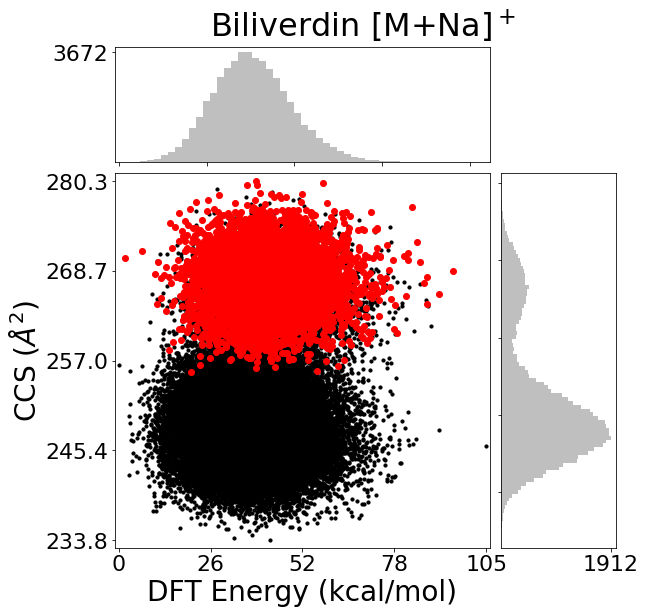

100


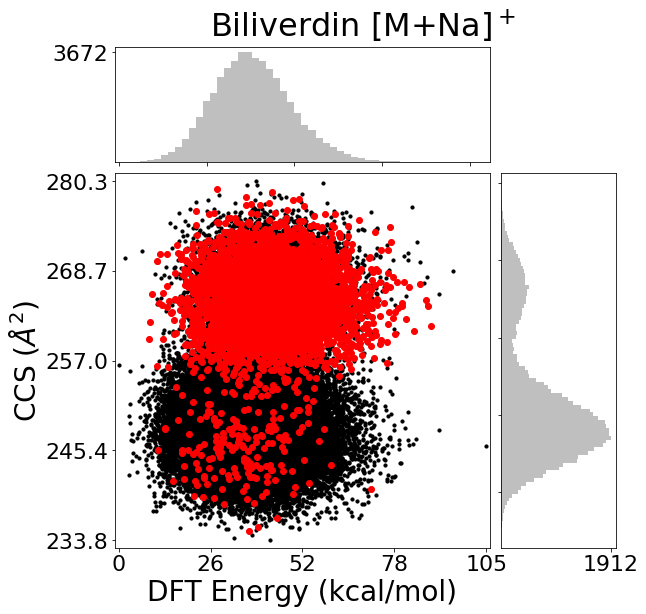

200


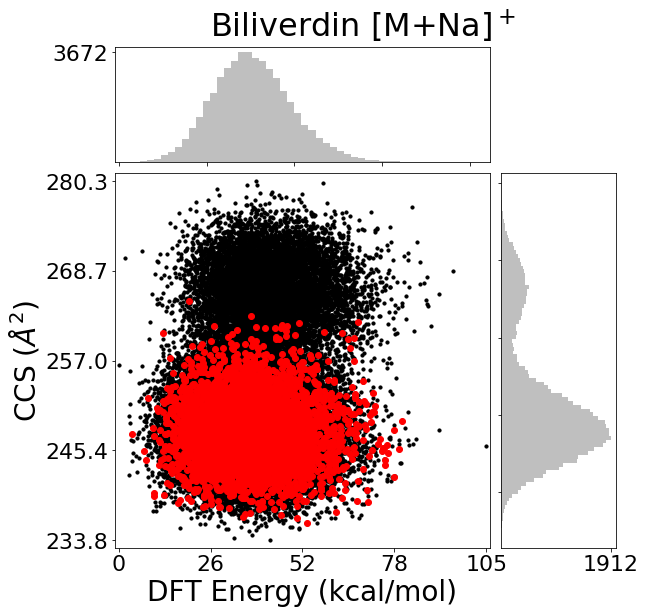

300


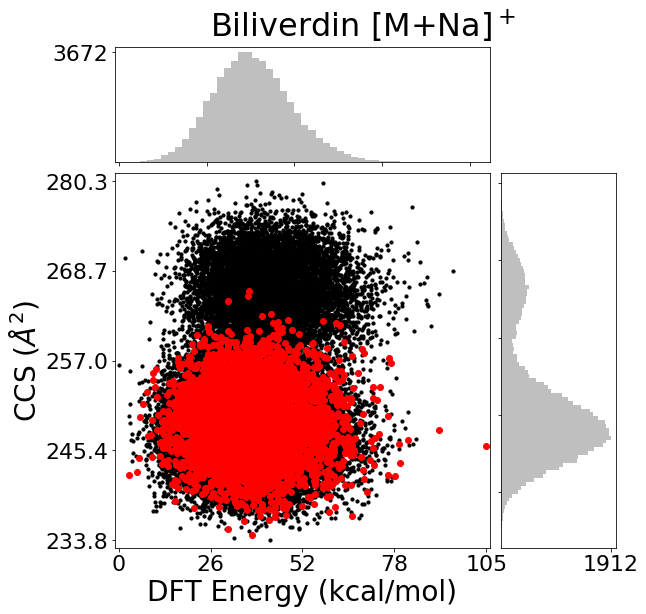

400


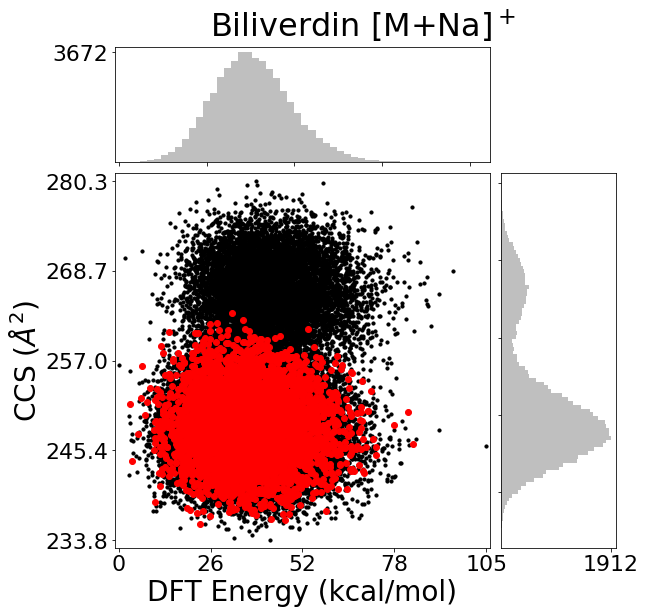

500


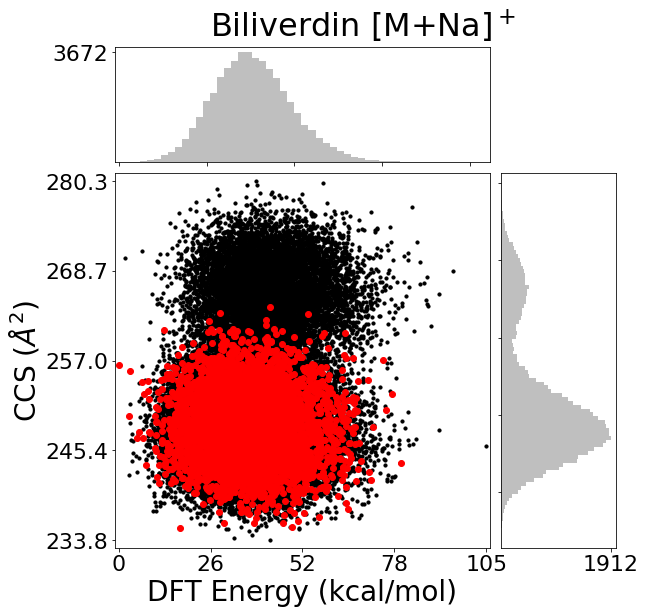

600


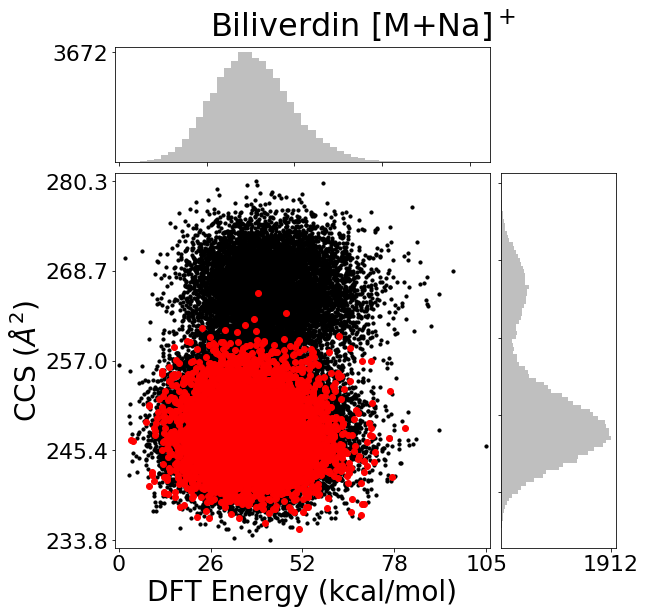

700


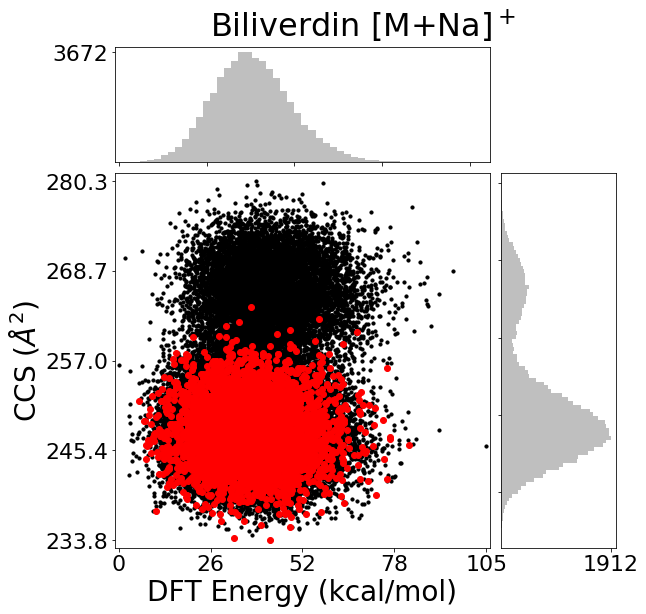

800


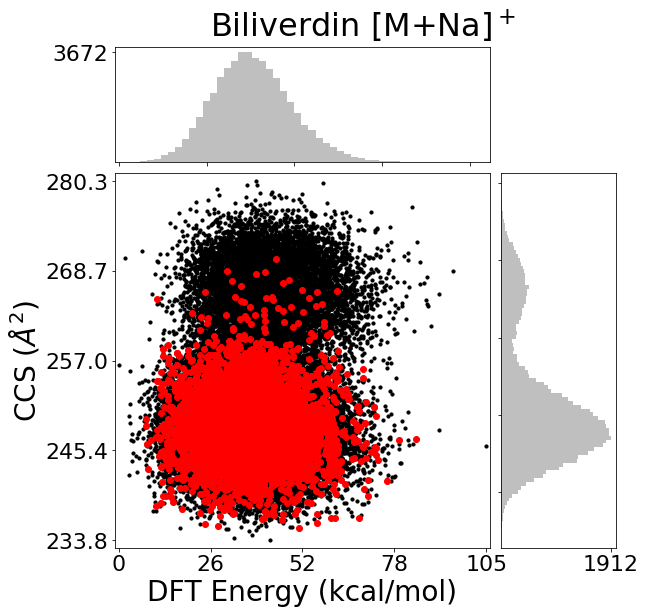

900


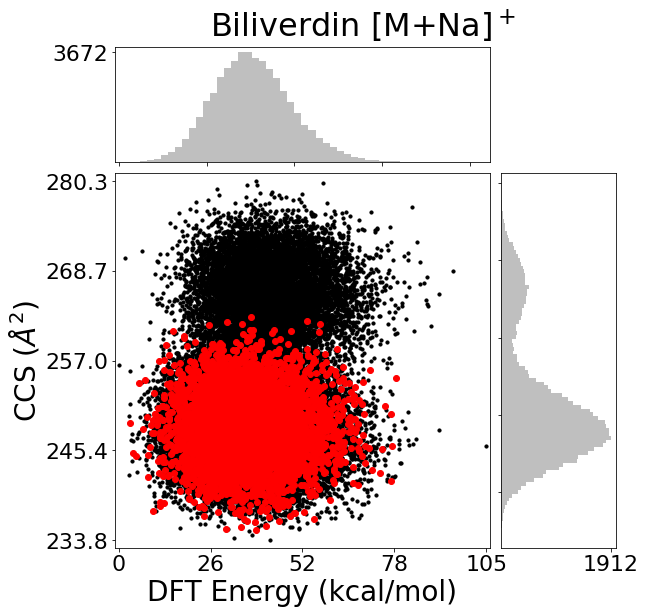

1000


IndexError: index 11 is out of bounds for axis 0 with size 11

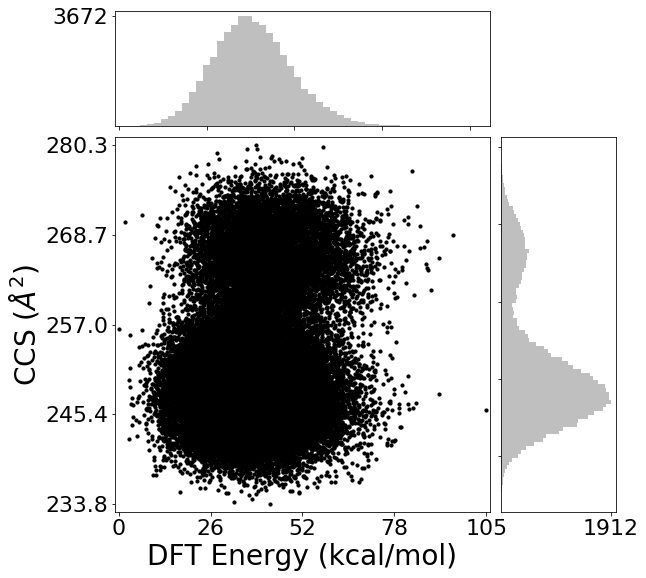

In [14]:
# There doesn't seem to be a cycle dependency on the range of energies captured by AMBER, despite what the above was 
# making me believe

cycles = np.arange(0, 1100, 100)
for c, cycle in enumerate(cycles):
    # Plot CCS v DFT energy
    #for d, ID in enumerate(molids[:1]): 
    d=11
    # look at 4, 8, 9, 10, 11 <-- fo sure this one
    for ID in molids[d:d+1]:  
        file = f'../data/molid{ID}_ccs.csv'

        if os.path.exists(file):
            pass
        else:
            continue

        df = pd.read_csv(file)

        # Set the minimum energy to 0 and scale the rest accordingly.
        # Comment these out to restore specific DFT energy values
        # Which are apparently mostly arbitrary, you can't compare them across molecules
        df['dft_energy'] *= 627.509 # Convert hartree to kcal/mol 
        min = df['dft_energy'].min()
        df['dft_energy'] = df['dft_energy'] - min

        x = df['dft_energy']
        y = df['ccs']

        nullfmt = NullFormatter()

        # Define the axes
        left, width = 0.1, 0.65
        bottom, height = 0.1, 0.65
        bottom_h = left_h = left + width + 0.02

        rect_scatter = [left, bottom, width, height]
        rect_histx = [left, bottom_h, width, 0.2]
        rect_histy = [left_h, bottom, 0.2, height]


        plt.figure(1, figsize=(8, 8))

        axScatter = plt.axes(rect_scatter)
        axHistx = plt.axes(rect_histx)
        axHisty = plt.axes(rect_histy)

        # no labels
        axHistx.xaxis.set_major_formatter(nullfmt)
        axHisty.yaxis.set_major_formatter(nullfmt)

        # Generate color by density
    #    xy = np.vstack([x,y])
    #    z = gaussian_kde(xy)(xy)
        z = 'black'
        # the scatter plot:
        axScatter.scatter(x, y, c=z, s=10)

        binwidth = 0.25

        #axScatter.set_xlim((np.min(x)-0.0015,np.max(x)+0.0015))
        axScatter.set_xlim((np.min(x)-1,np.max(x)+1))
        axScatter.set_ylim((np.min(y)-1,np.max(y)+1))
        axScatter.set_ylabel('CCS ($\AA^2$)', fontsize=28)
        axScatter.set_xlabel('DFT Energy (kcal/mol)', fontsize=28)

        binwidthx = 2
        binwidthy = 0.5
        binx = np.arange(np.min(x), np.max(x), binwidthx)
        biny = np.arange(np.min(y), np.max(y), binwidthy)
        hxy, hxx, _ = axHistx.hist(x, bins=binx, color='#bfbfbf')
        hyy, hyx, _ = axHisty.hist(y, bins=biny, orientation='horizontal', color='#bfbfbf')

        axHistx.set_xlim(axScatter.get_xlim())
        axHisty.set_ylim(axScatter.get_ylim())
        #axHistx.set_xticklabels(x_ticks, rotation=0, fontsize=12)
        #axHisty.set_yticklabels(y_ticks, rotation=0, fontsize=2)


        # Adjust tick sizes and fonts
        axHistx.tick_params(axis='both', which='major', labelsize=22)
        axHisty.tick_params(axis='both', which='major', labelsize=22)
        axScatter.tick_params(axis='both', which='major', labelsize=22)

        axScatter.xaxis.set_major_formatter(FormatStrFormatter('%0.0f'))
        axScatter.yaxis.set_major_formatter(FormatStrFormatter('%0.1f'))


        #xtic = np.linspace(np.min(x)-0.01, np.max(x)+0.01, 3) # For using real DFT values
        xtic = np.linspace(np.min(x), np.max(x), 5)
        ytic = np.linspace(np.min(y), np.max(y), 5)
        axScatter.set_xticks(xtic)
        axScatter.set_yticks(ytic)

        axHistx.set_yticks([hxy.max()])
        axHisty.set_xticks([hyy.max()])

        # Plot cycles as colored (check for clustering)
        #cycle = 10
        print(cycle)
        index = df.loc[(df['cycle'] > cycles[c]) & (df['cycle'] < cycles[c+1])].index
        axScatter.scatter(x[index], y[index], c='red')
        
#         index = df.loc[df['cycle'] == cycle+1].index
#         axScatter.scatter(x[index], y[index], c='blue')
        
#         index = df.loc[df['cycle'] == cycle+2].index
#         axScatter.scatter(x[index], y[index], c='green')      
        
#         index = df.loc[df['cycle'] == cycle+3].index
#         axScatter.scatter(x[index], y[index], c='yellow')         

        plt.title(f'{names[d]} [M{adducts[d]}]$^{adducts[d][0]}$', fontsize=32, y=1.35, x=-1.2)
        plt.show()